# Netflix Movies & TV Shows - Recommendation System

## Project Overview
This project performs comprehensive Exploratory Data Analysis (EDA) on the Netflix Movies and TV Shows dataset, followed by building a content-based recommendation system.

**Dataset Source:** [Kaggle - Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)

### Project Structure
1. Data Loading & Initial Exploration
2. Feature Types Analysis
3. Data Cleaning & Preprocessing
4. Feature Engineering
5. Exploratory Data Analysis (EDA)
6. Hypothesis Testing
7. Content-Based Recommendation System
8. Conclusions & Insights

## 1. Data Loading & Initial Exploration

### 1.1 Import Required Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.preprocessing import LabelEncoder
from scipy import stats

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Netflix brand color palette
NETFLIX_RED = '#E50914'
NETFLIX_BLACK = '#141414'
NETFLIX_DARK_GRAY = '#221F1F'
NETFLIX_GRAY = '#B3B3B3'
NETFLIX_WHITE = '#FFFFFF'

COLORS = {
    'primary': '#E50914',
    'secondary': '#564D4D',
    'accent': '#831010',
    'light': '#F5F5F1',
    'dark': '#141414',
    'gradient': ['#E50914', '#B20710', '#831010', '#564D4D', '#221F1F']
}

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'figure.facecolor': '#FFFFFF',
    'figure.edgecolor': '#FFFFFF',
    'figure.dpi': 100,
    'figure.titlesize': 16,
    'figure.titleweight': 'bold',
    'axes.facecolor': '#FAFAFA',
    'axes.edgecolor': '#DDDDDD',
    'axes.labelsize': 11,
    'axes.labelweight': 'medium',
    'axes.titlesize': 13,
    'axes.titleweight': 'bold',
    'axes.titlepad': 15,
    'axes.labelpad': 10,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'grid.color': '#CCCCCC',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'xtick.color': '#333333',
    'ytick.color': '#333333',
    'legend.fontsize': 10,
    'legend.framealpha': 0.9,
    'legend.edgecolor': '#DDDDDD',
    'legend.fancybox': True,
    'font.family': 'sans-serif',
    'font.size': 10,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.2
})

netflix_cmap = sns.color_palette([NETFLIX_RED, '#B20710', '#831010', '#564D4D', '#221F1F'])
sns.set_palette(netflix_cmap)

print("Libraries imported and visualization settings configured.")

Libraries imported and visualization settings configured.


### 1.2 Load the Dataset

In [34]:
import kagglehub
import os

path = kagglehub.dataset_download("shivamb/netflix-shows")
print(f"Dataset path: {path}")

csv_file = os.path.join(path, 'netflix_titles.csv')
df = pd.read_csv(csv_file)

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset path: /Users/nusratbegum/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5
Dataset loaded: 8807 rows, 12 columns


### 1.3 First Look at the Data

In [35]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [37]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## 2. Feature Types Analysis

Understanding the nature and type of each feature is crucial for proper analysis and preprocessing.

### Dataset Features:
| Feature | Description | Type |
|---------|-------------|------|
| `show_id` | Unique ID for each show | Identifier (Nominal) |
| `type` | Movie or TV Show | Categorical (Binary) |
| `title` | Title of the content | Text (Nominal) |
| `director` | Director(s) name | Categorical (Nominal) |
| `cast` | Cast members | Text (Nominal) |
| `country` | Country of production | Categorical (Nominal) |
| `date_added` | Date added to Netflix | Temporal (Date) |
| `release_year` | Year of release | Numerical (Discrete) |
| `rating` | Content rating | Categorical (Ordinal) |
| `duration` | Duration (min/seasons) | Text/Numerical |
| `listed_in` | Genre categories | Categorical (Multi-label) |
| `description` | Synopsis | Text (Free-form) |

In [38]:
feature_analysis = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes.values,
    'Non_Null_Count': df.count().values,
    'Null_Count': df.isnull().sum().values,
    'Null_Percentage': (df.isnull().sum() / len(df) * 100).round(2).values,
    'Unique_Values': df.nunique().values
})

def categorize_feature(col):
    if col == 'show_id':
        return 'Identifier'
    elif col in ['type', 'rating']:
        return 'Categorical'
    elif col in ['director', 'cast', 'country', 'listed_in']:
        return 'Categorical (Multi-value)'
    elif col in ['title', 'description']:
        return 'Text'
    elif col == 'date_added':
        return 'Temporal'
    elif col == 'release_year':
        return 'Numerical (Discrete)'
    elif col == 'duration':
        return 'Mixed (Text/Numerical)'
    else:
        return 'Unknown'

feature_analysis['Feature_Category'] = feature_analysis['Column'].apply(categorize_feature)
feature_analysis

,Column,Data_Type,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values,Feature_Category
0,show_id,object,8807,0,0.00,8807,Identifier
1,type,object,8807,0,0.00,2,Categorical
2,title,object,8807,0,0.00,8807,Text
3,director,object,6173,2634,29.91,4528,Categorical (Multi-value)
4,cast,object,7982,825,9.37,7692,Categorical (Multi-value)
5,country,object,7976,831,9.44,748,Categorical (Multi-value)
6,date_added,object,8797,10,0.11,1767,Temporal
7,release_year,int64,8807,0,0.00,74,Numerical (Discrete)
8,rating,object,8803,4,0.05,17,Categorical
9,duration,object,8804,3,0.03,220,Mixed (Text/Numerical)


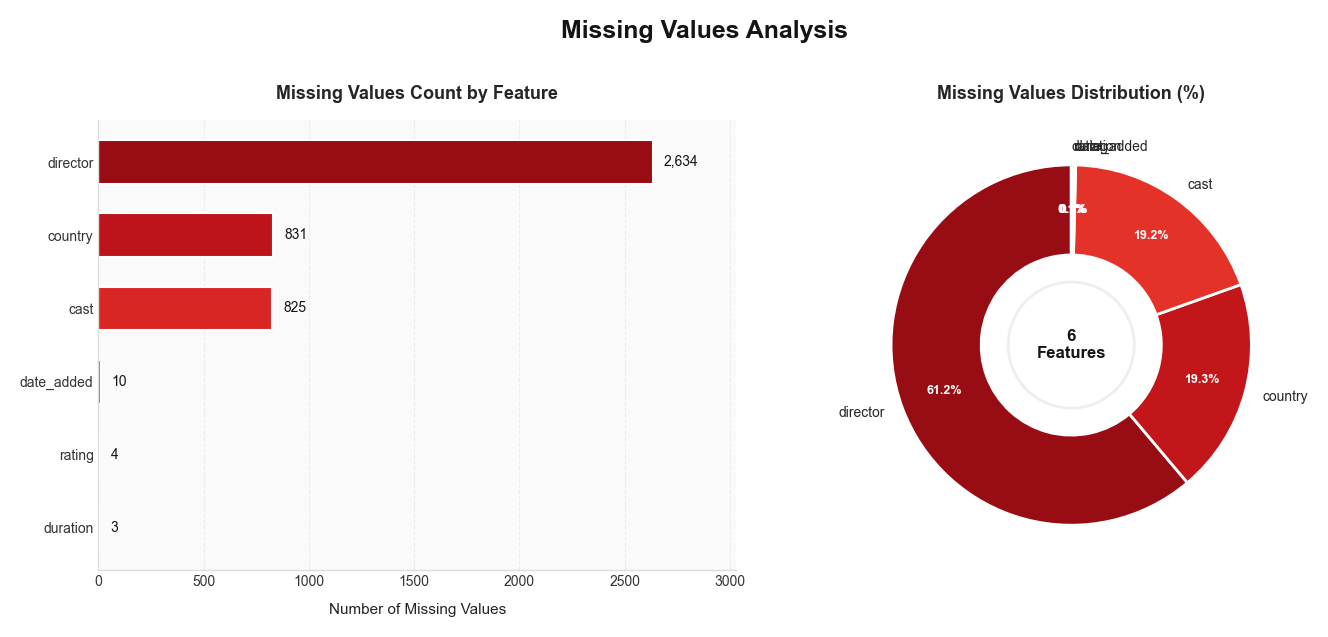


Total missing values: 4,307 (4.08% of dataset)


In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Missing Values Analysis', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

missing_data = df.isnull().sum().sort_values(ascending=True)
missing_data = missing_data[missing_data > 0]

ax1 = axes[0]
colors_gradient = plt.cm.Reds(np.linspace(0.4, 0.9, len(missing_data)))
bars = ax1.barh(missing_data.index, missing_data.values, color=colors_gradient, 
                edgecolor='white', linewidth=1.5, height=0.6)
ax1.set_xlabel('Number of Missing Values', fontsize=11, fontweight='medium')
ax1.set_title('Missing Values Count by Feature', fontsize=13, fontweight='bold', pad=15)
ax1.set_xlim(0, missing_data.max() * 1.15)

for bar, val in zip(bars, missing_data.values):
    ax1.text(val + missing_data.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val:,}', va='center', ha='left', fontsize=10, fontweight='medium', color=NETFLIX_BLACK)

ax1.tick_params(axis='y', labelsize=10)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.grid(axis='y', visible=False)

ax2 = axes[1]
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]

colors_pie = plt.cm.Reds(np.linspace(0.9, 0.3, len(missing_pct)))
wedges, texts, autotexts = ax2.pie(missing_pct.values, labels=missing_pct.index, autopct='%1.1f%%', 
                                     colors=colors_pie, startangle=90, pctdistance=0.75,
                                     wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2))

for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('medium')
for autotext in autotexts:
    autotext.set_fontsize(9)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

ax2.set_title('Missing Values Distribution (%)', fontsize=13, fontweight='bold', pad=15)

centre_circle = plt.Circle((0, 0), 0.35, fc='white', ec='#EEEEEE', linewidth=2)
ax2.add_artist(centre_circle)
ax2.text(0, 0, f'{len(missing_pct)}\nFeatures', ha='center', va='center', 
         fontsize=12, fontweight='bold', color=NETFLIX_BLACK)

plt.tight_layout()
plt.show()

total_missing = df.isnull().sum().sum()
total_cells = df.size
print(f"\nTotal missing values: {total_missing:,} ({(total_missing / total_cells * 100):.2f}% of dataset)")

---
## 3. Data Cleaning & Preprocessing

### 3.1 Handle Missing Values

In [40]:
df_clean = df.copy()

# Fill missing values with appropriate strategies
df_clean['director'] = df_clean['director'].fillna('Unknown')
df_clean['cast'] = df_clean['cast'].fillna('Unknown')
df_clean['country'] = df_clean['country'].fillna('Unknown')
df_clean['date_added'] = df_clean['date_added'].fillna(df_clean['date_added'].mode()[0])
df_clean['rating'] = df_clean['rating'].fillna(df_clean['rating'].mode()[0])
df_clean['duration'] = df_clean['duration'].fillna('Unknown')

print("Missing values after cleaning:")
print(df_clean.isnull().sum())

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


### 3.2 Data Type Conversions

In [41]:
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'].str.strip())

print(f"Date range: {df_clean['date_added'].min()} to {df_clean['date_added'].max()}")
df_clean.dtypes

Date range: 2008-01-01 00:00:00 to 2021-09-25 00:00:00


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

---
## 4. Feature Engineering

Creating new meaningful features from existing data to enhance analysis and recommendation quality.

In [42]:
current_year = datetime.now().year

# Temporal features from date_added
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month
df_clean['day_of_week_added'] = df_clean['date_added'].dt.day_name()

# Content age metrics
df_clean['content_age'] = current_year - df_clean['release_year']
df_clean['time_to_netflix'] = df_clean['year_added'] - df_clean['release_year']

# Extract numeric duration
def extract_duration(duration):
    if pd.isna(duration) or duration == 'Unknown':
        return np.nan
    try:
        return int(duration.split()[0])
    except:
        return np.nan

df_clean['duration_value'] = df_clean['duration'].apply(extract_duration)

# Duration categories for movies
def categorize_duration(row):
    if row['type'] == 'TV Show':
        return 'TV Show'
    duration = row['duration_value']
    if pd.isna(duration):
        return 'Unknown'
    elif duration < 60:
        return 'Short (<60 min)'
    elif duration < 90:
        return 'Medium (60-90 min)'
    elif duration < 120:
        return 'Standard (90-120 min)'
    else:
        return 'Long (>120 min)'

df_clean['duration_category'] = df_clean.apply(categorize_duration, axis=1)

# Country-related features
df_clean['primary_country'] = df_clean['country'].apply(
    lambda x: x.split(',')[0].strip() if x != 'Unknown' else 'Unknown')
df_clean['country_count'] = df_clean['country'].apply(
    lambda x: len(x.split(',')) if x != 'Unknown' else 0)

# Genre-related features
df_clean['primary_genre'] = df_clean['listed_in'].apply(lambda x: x.split(',')[0].strip())
df_clean['genre_count'] = df_clean['listed_in'].apply(lambda x: len(x.split(',')))

# Cast and description features
df_clean['cast_count'] = df_clean['cast'].apply(
    lambda x: len(x.split(',')) if x != 'Unknown' else 0)
df_clean['description_length'] = df_clean['description'].apply(lambda x: len(str(x).split()))
df_clean['is_recent'] = df_clean['release_year'] >= (current_year - 5)

print(f"New dataset shape: {df_clean.shape}")
print(f"New features created: {df_clean.shape[1] - df.shape[1]}")

New dataset shape: (8807, 26)
New features created: 14


In [43]:
df_clean[['title', 'type', 'year_added', 'month_added', 'content_age', 'time_to_netflix', 
          'duration_value', 'duration_category', 'primary_country', 'primary_genre', 
          'genre_count', 'cast_count', 'description_length', 'is_recent']].head(10)

,title,type,year_added,month_added,content_age,time_to_netflix,duration_value,duration_category,primary_country,primary_genre,genre_count,cast_count,description_length,is_recent
0,Dick Johnson Is Dead,Movie,2021,9,5,1,90.0,Standard (90-120 min),United States,Documentaries,1,0,27,True
1,Blood & Water,TV Show,2021,9,4,0,2.0,TV Show,South Africa,International TV Shows,3,19,27,True
2,Ganglands,TV Show,2021,9,4,0,1.0,TV Show,Unknown,Crime TV Shows,3,9,27,True
3,Jailbirds New Orleans,TV Show,2021,9,4,0,1.0,TV Show,Unknown,Docuseries,2,0,24,True
4,Kota Factory,TV Show,2021,9,4,0,2.0,TV Show,India,International TV Shows,3,8,24,True
5,Midnight Mass,TV Show,2021,9,4,0,1.0,TV Show,Unknown,TV Dramas,3,16,23,True
6,My Little Pony: A New Generation,Movie,2021,9,4,0,91.0,Standard (90-120 min),Unknown,Children & Family Movies,1,10,25,True
7,Sankofa,Movie,2021,9,32,28,125.0,Long (>120 min),United States,Dramas,3,8,28,False
8,The Great British Baking Show,TV Show,2021,9,4,0,9.0,TV Show,United Kingdom,British TV Shows,2,4,26,True
9,The Starling,Movie,2021,9,4,0,104.0,Standard (90-120 min),United States,Comedies,2,11,29,True


---
## 5. Exploratory Data Analysis (EDA)

### 5.1 Content Type Distribution

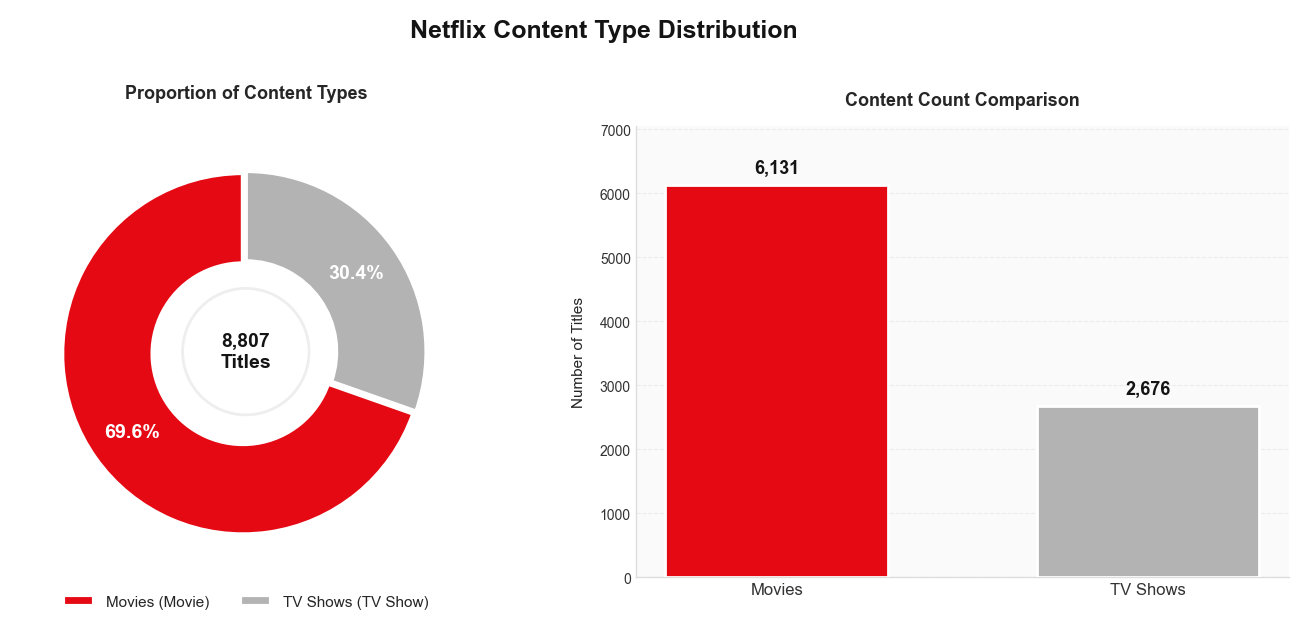


Movies: 6,131 (69.6%)
TV Shows: 2,676 (30.4%)


In [44]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Netflix Content Type Distribution', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

type_counts = df_clean['type'].value_counts()

# Donut chart
ax1 = axes[0]
colors = [NETFLIX_RED, NETFLIX_GRAY]
explode = (0.02, 0)
wedges, texts, autotexts = ax1.pie(type_counts.values, labels=None, autopct='%1.1f%%',
                                     colors=colors, explode=explode, startangle=90,
                                     pctdistance=0.75, wedgeprops=dict(width=0.5, edgecolor='white', linewidth=3))

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

centre_circle = plt.Circle((0, 0), 0.35, fc='white', ec='#EEEEEE', linewidth=2)
ax1.add_artist(centre_circle)
ax1.text(0, 0, f'{len(df_clean):,}\nTitles', ha='center', va='center', 
         fontsize=14, fontweight='bold', color=NETFLIX_BLACK)

ax1.legend(wedges, [f'Movies ({type_counts.index[0]})', f'TV Shows ({type_counts.index[1]})'], 
           loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=11, 
           frameon=False)
ax1.set_title('Proportion of Content Types', fontsize=13, fontweight='bold', pad=20)

# Bar chart
ax2 = axes[1]
x_pos = np.arange(len(type_counts))
bars = ax2.bar(x_pos, type_counts.values, color=colors, edgecolor='white', 
               linewidth=2, width=0.6, zorder=3)

ax2.set_xticks(x_pos)
ax2.set_xticklabels(['Movies', 'TV Shows'], fontsize=12, fontweight='medium')
ax2.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax2.set_title('Content Count Comparison', fontsize=13, fontweight='bold', pad=15)
ax2.set_ylim(0, type_counts.max() * 1.15)

for bar, val in zip(bars, type_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + type_counts.max() * 0.02,
             f'{val:,}', ha='center', va='bottom', fontsize=13, fontweight='bold', color=NETFLIX_BLACK)

ax2.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)
ax2.grid(axis='x', visible=False)

plt.tight_layout()
plt.show()

print(f"\nMovies: {type_counts.get('Movie', 0):,} ({type_counts.get('Movie', 0)/len(df_clean)*100:.1f}%)")
print(f"TV Shows: {type_counts.get('TV Show', 0):,} ({type_counts.get('TV Show', 0)/len(df_clean)*100:.1f}%)")

### 5.2 Content Added Over Time

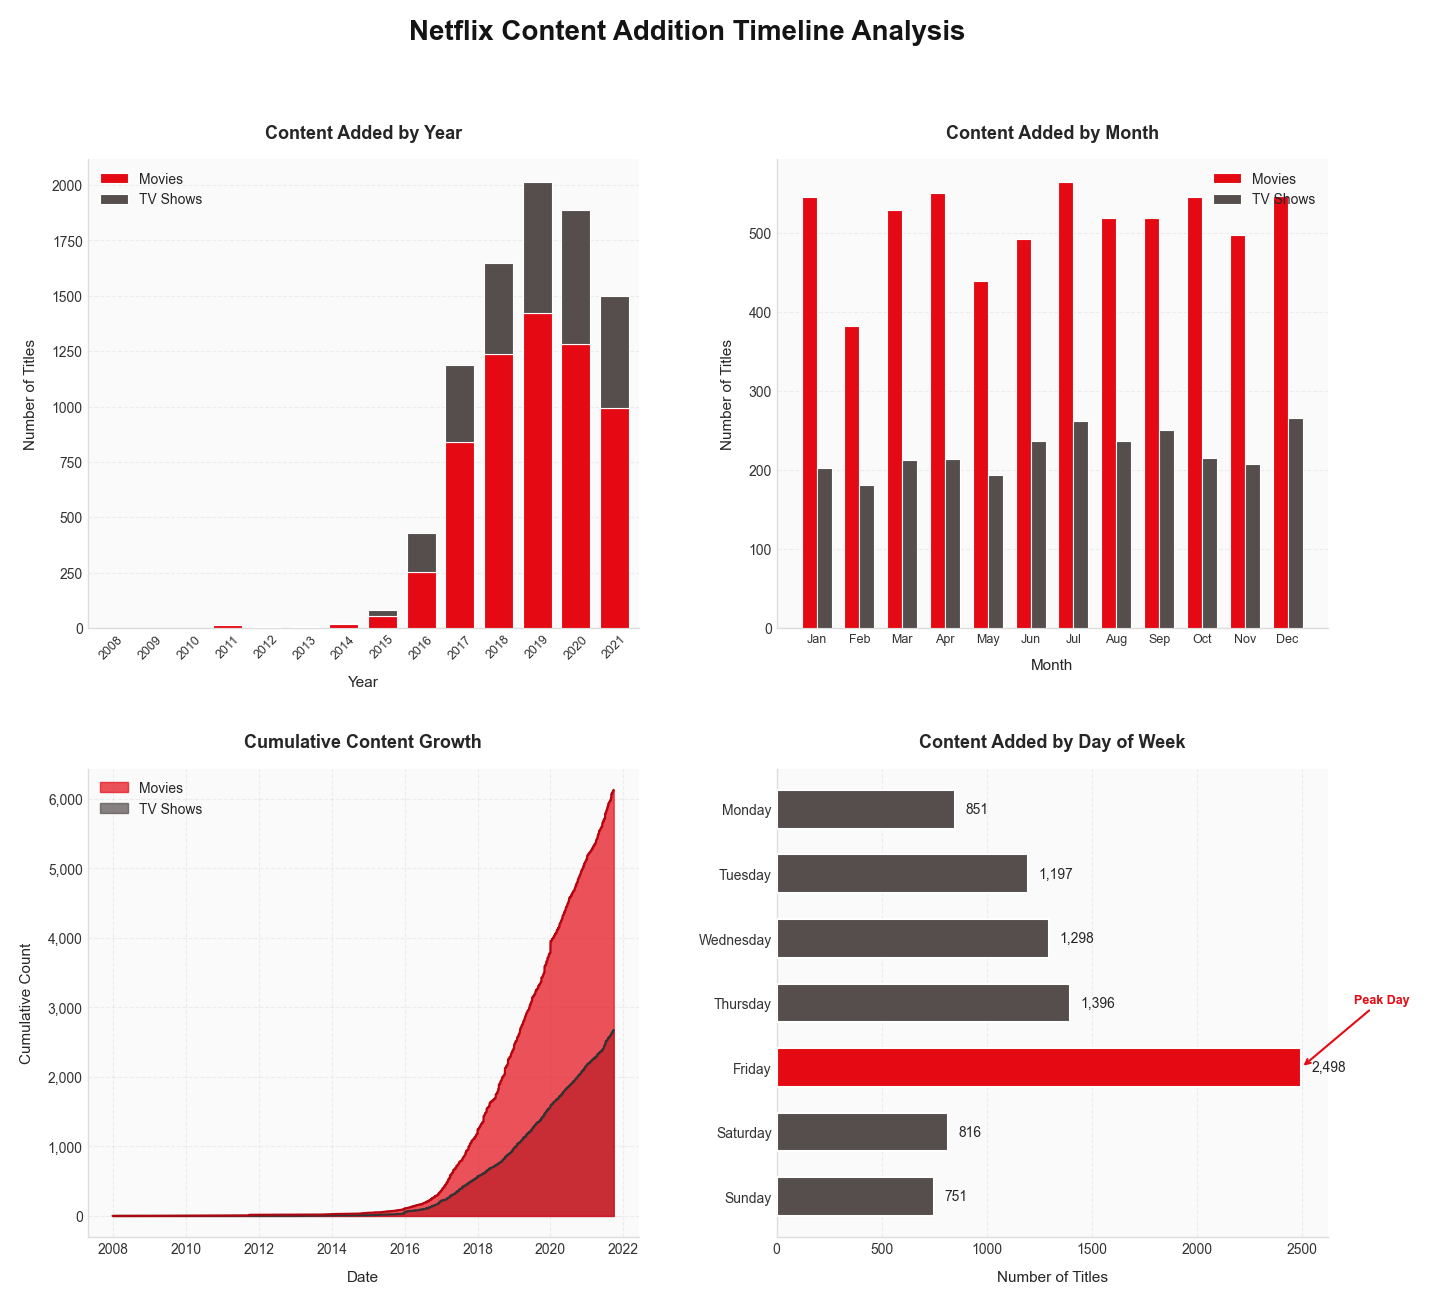

In [45]:
fig = plt.figure(figsize=(16, 14))
fig.suptitle('Netflix Content Addition Timeline Analysis', fontsize=20, fontweight='bold', 
             color=NETFLIX_BLACK, y=0.98)

gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.25)

# Content added by year (stacked bar)
ax1 = fig.add_subplot(gs[0, 0])
yearly_content = df_clean.groupby(['year_added', 'type']).size().unstack(fill_value=0)
yearly_content.plot(kind='bar', stacked=True, ax=ax1, color=[NETFLIX_RED, '#564D4D'], 
                    edgecolor='white', linewidth=0.8, width=0.75, zorder=3)
ax1.set_title('Content Added by Year', fontsize=13, fontweight='bold', pad=15)
ax1.set_xlabel('Year', fontsize=11, fontweight='medium')
ax1.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax1.legend(['Movies', 'TV Shows'], loc='upper left', framealpha=0.9, fontsize=10)
ax1.tick_params(axis='x', rotation=45, labelsize=9)
ax1.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)
ax1.grid(axis='x', visible=False)
ax1.set_axisbelow(True)

# Content added by month
ax2 = fig.add_subplot(gs[0, 1])
monthly_content = df_clean.groupby(['month_added', 'type']).size().unstack(fill_value=0)
x = np.arange(len(monthly_content))
width = 0.35
bars1 = ax2.bar(x - width/2, monthly_content['Movie'], width, label='Movies', 
                color=NETFLIX_RED, edgecolor='white', linewidth=0.8, zorder=3)
bars2 = ax2.bar(x + width/2, monthly_content['TV Show'], width, label='TV Shows', 
                color='#564D4D', edgecolor='white', linewidth=0.8, zorder=3)
ax2.set_title('Content Added by Month', fontsize=13, fontweight='bold', pad=15)
ax2.set_xlabel('Month', fontsize=11, fontweight='medium')
ax2.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticks(x)
ax2.set_xticklabels(month_labels, fontsize=9)
ax2.legend(loc='upper right', framealpha=0.9, fontsize=10)
ax2.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)
ax2.grid(axis='x', visible=False)

# Cumulative growth
ax3 = fig.add_subplot(gs[1, 0])
df_clean_sorted = df_clean.sort_values('date_added')
movies_cumsum = (df_clean_sorted['type'] == 'Movie').cumsum()
tv_cumsum = (df_clean_sorted['type'] == 'TV Show').cumsum()

ax3.fill_between(df_clean_sorted['date_added'], movies_cumsum, alpha=0.7, 
                  color=NETFLIX_RED, label='Movies', zorder=3)
ax3.fill_between(df_clean_sorted['date_added'], tv_cumsum, alpha=0.7, 
                  color='#564D4D', label='TV Shows', zorder=2)
ax3.plot(df_clean_sorted['date_added'], movies_cumsum, color='#B20710', linewidth=1.5, zorder=4)
ax3.plot(df_clean_sorted['date_added'], tv_cumsum, color='#333333', linewidth=1.5, zorder=3)

ax3.set_title('Cumulative Content Growth', fontsize=13, fontweight='bold', pad=15)
ax3.set_xlabel('Date', fontsize=11, fontweight='medium')
ax3.set_ylabel('Cumulative Count', fontsize=11, fontweight='medium')
ax3.legend(loc='upper left', framealpha=0.9, fontsize=10)
ax3.grid(axis='both', alpha=0.3, linestyle='--', zorder=0)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Day of week distribution
ax4 = fig.add_subplot(gs[1, 1])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_content = df_clean['day_of_week_added'].value_counts().reindex(day_order)

colors_days = [NETFLIX_RED if day == 'Friday' else '#564D4D' for day in day_order]
bars = ax4.barh(day_order, day_content.values, color=colors_days, 
                edgecolor='white', linewidth=1.5, height=0.6, zorder=3)
ax4.set_title('Content Added by Day of Week', fontsize=13, fontweight='bold', pad=15)
ax4.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax4.invert_yaxis()

for bar, val in zip(bars, day_content.values):
    ax4.text(val + day_content.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val:,}', va='center', ha='left', fontsize=10, fontweight='medium')

ax4.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax4.grid(axis='y', visible=False)

ax4.annotate('Peak Day', xy=(day_content['Friday'], 4), xytext=(day_content['Friday'] * 1.1, 3),
             fontsize=9, fontweight='bold', color=NETFLIX_RED,
             arrowprops=dict(arrowstyle='->', color=NETFLIX_RED, lw=1.5))

plt.tight_layout()
plt.show()

### 5.3 Genre Analysis

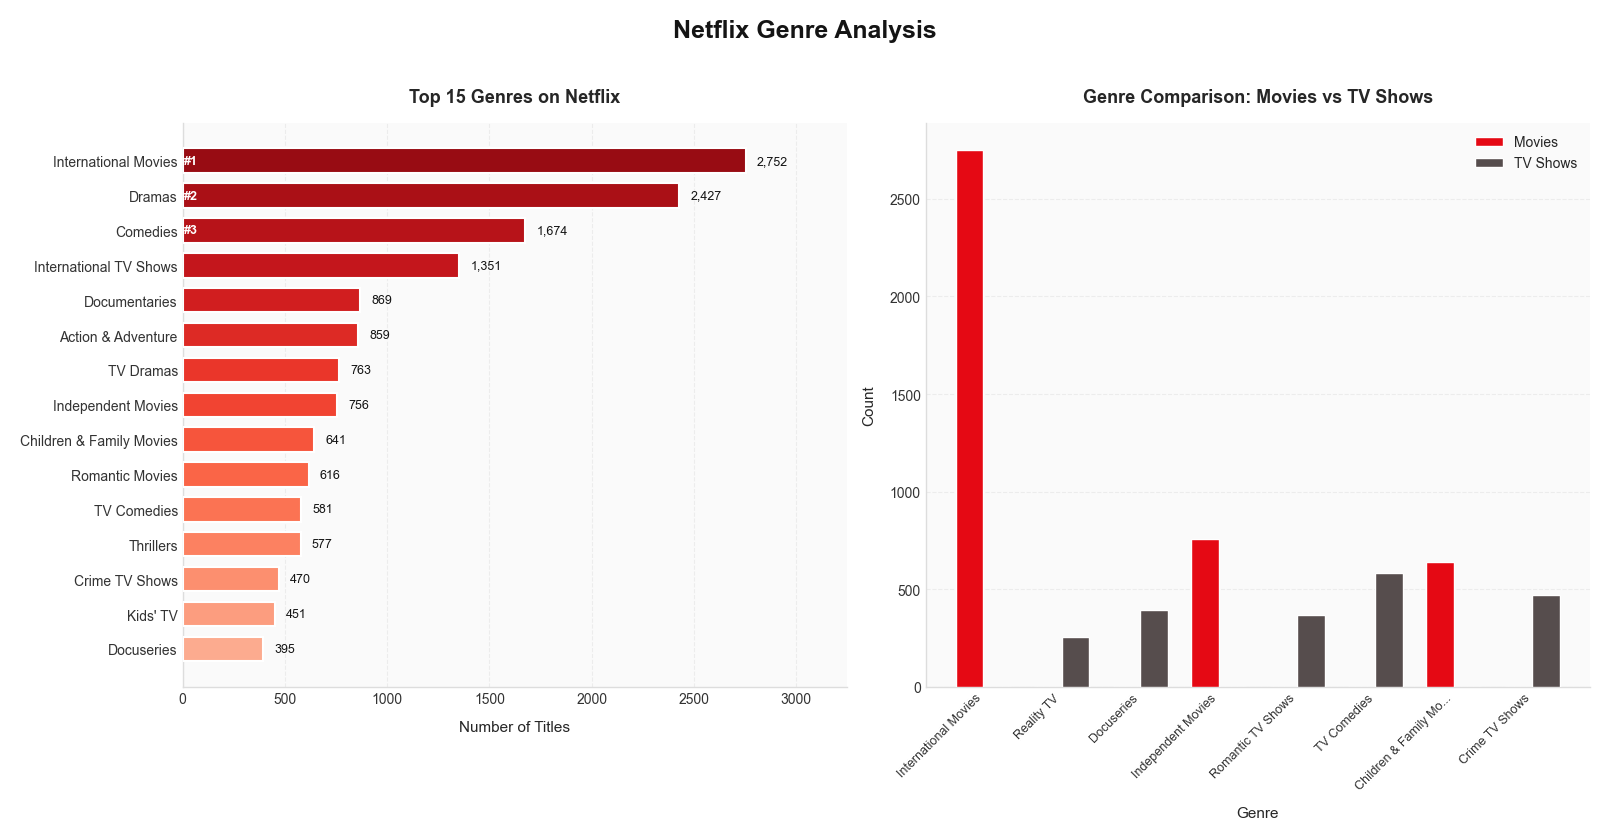


Total unique genres: 42
Top 3 genres: International Movies, Dramas, Comedies


In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Netflix Genre Analysis', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

all_genres = df_clean['listed_in'].str.split(', ').explode()
genre_counts = all_genres.value_counts()

# Top 15 genres
ax1 = axes[0]
top_genres = genre_counts.head(15)
colors_gradient = plt.cm.Reds(np.linspace(0.9, 0.3, len(top_genres)))

bars = ax1.barh(range(len(top_genres)), top_genres.values, color=colors_gradient, 
                edgecolor='white', linewidth=1.5, height=0.7, zorder=3)
ax1.set_yticks(range(len(top_genres)))
ax1.set_yticklabels(top_genres.index, fontsize=10)
ax1.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax1.set_title('Top 15 Genres on Netflix', fontsize=13, fontweight='bold', pad=15)
ax1.invert_yaxis()
ax1.set_xlim(0, top_genres.max() * 1.18)

for i, (bar, val) in enumerate(zip(bars, top_genres.values)):
    ax1.text(val + top_genres.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val:,}', va='center', ha='left', fontsize=9, fontweight='medium', color=NETFLIX_BLACK)
    if i < 3:
        ax1.text(5, bar.get_y() + bar.get_height()/2, f'#{i+1}', 
                 va='center', ha='left', fontsize=9, fontweight='bold', color='white')

ax1.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax1.grid(axis='y', visible=False)

# Genre by content type
ax2 = axes[1]
movies_genres = df_clean[df_clean['type'] == 'Movie']['listed_in'].str.split(', ').explode().value_counts().head(10)
tv_genres = df_clean[df_clean['type'] == 'TV Show']['listed_in'].str.split(', ').explode().value_counts().head(10)

common_genres = list(set(movies_genres.index[:8]) | set(tv_genres.index[:8]))[:8]
x = np.arange(len(common_genres))
width = 0.35

movie_vals = [movies_genres.get(g, 0) for g in common_genres]
tv_vals = [tv_genres.get(g, 0) for g in common_genres]

bars1 = ax2.bar(x - width/2, movie_vals, width, label='Movies', 
                color=NETFLIX_RED, edgecolor='white', linewidth=1, zorder=3)
bars2 = ax2.bar(x + width/2, tv_vals, width, label='TV Shows', 
                color='#564D4D', edgecolor='white', linewidth=1, zorder=3)

ax2.set_xlabel('Genre', fontsize=11, fontweight='medium')
ax2.set_ylabel('Count', fontsize=11, fontweight='medium')
ax2.set_title('Genre Comparison: Movies vs TV Shows', fontsize=13, fontweight='bold', pad=15)
ax2.set_xticks(x)

short_labels = [g[:20] + '...' if len(g) > 20 else g for g in common_genres]
ax2.set_xticklabels(short_labels, rotation=45, ha='right', fontsize=9)
ax2.legend(loc='upper right', framealpha=0.9, fontsize=10)
ax2.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)
ax2.grid(axis='x', visible=False)

plt.tight_layout()
plt.show()

print(f"\nTotal unique genres: {len(genre_counts)}")
print(f"Top 3 genres: {genre_counts.index[0]}, {genre_counts.index[1]}, {genre_counts.index[2]}")

### 5.4 Country Analysis

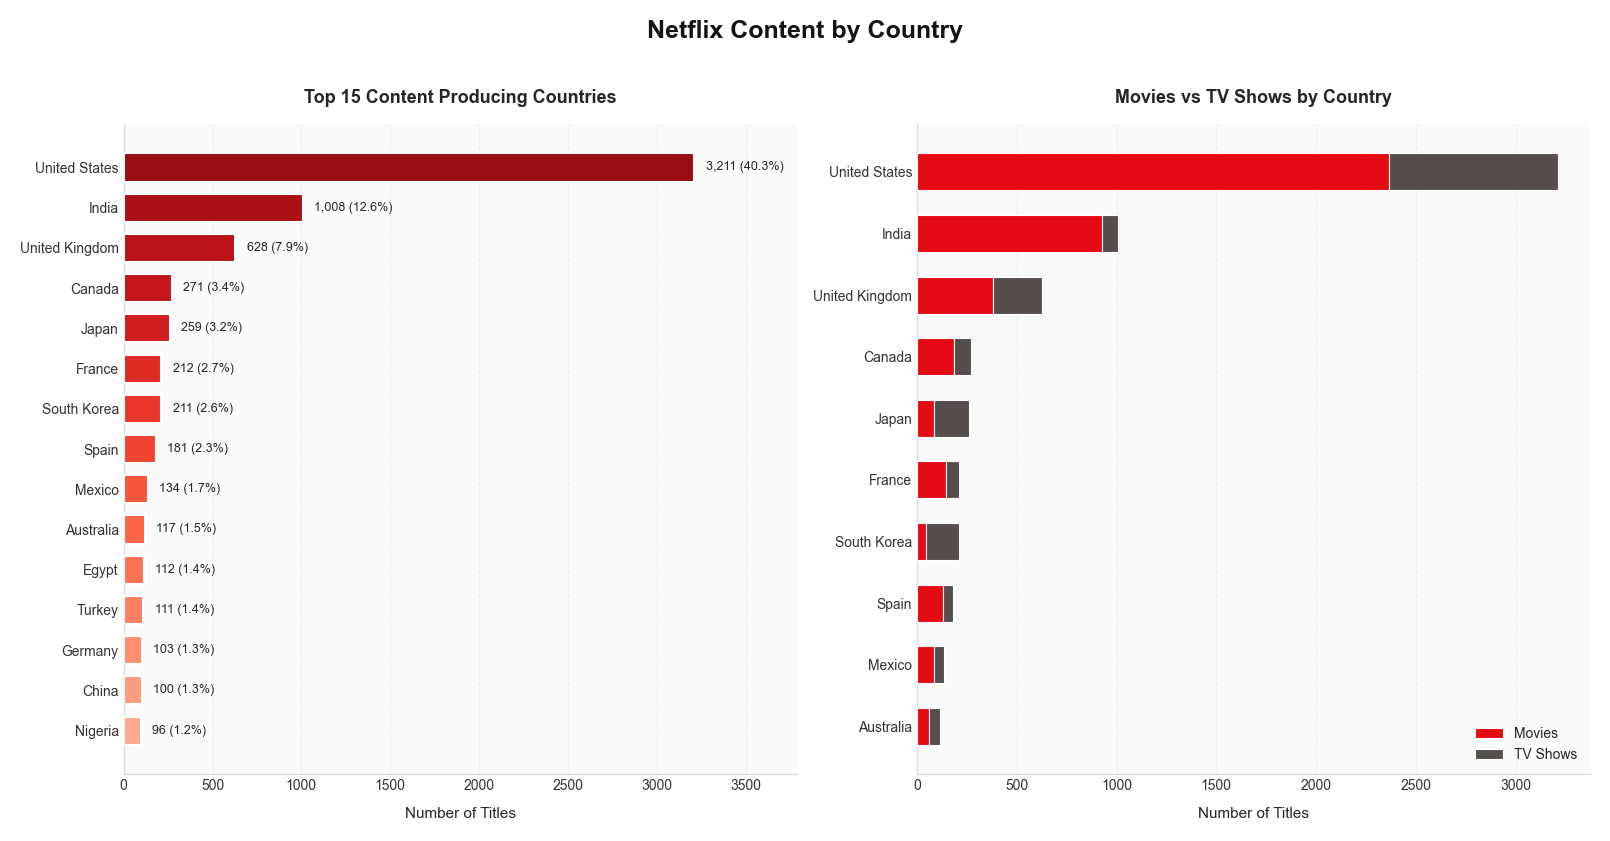


US Content: 3,211 titles (36.5%)
Countries represented: 87


In [47]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Netflix Content by Country', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

# Top 15 countries
ax1 = axes[0]
country_counts = df_clean['primary_country'].value_counts()
country_counts = country_counts[country_counts.index != 'Unknown'].head(15)

colors_gradient = plt.cm.Reds(np.linspace(0.9, 0.3, len(country_counts)))
bars = ax1.barh(range(len(country_counts)), country_counts.values, color=colors_gradient, 
                edgecolor='white', linewidth=1.5, height=0.7, zorder=3)
ax1.set_yticks(range(len(country_counts)))
ax1.set_yticklabels(country_counts.index, fontsize=10)
ax1.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax1.set_title('Top 15 Content Producing Countries', fontsize=13, fontweight='bold', pad=15)
ax1.invert_yaxis()
ax1.set_xlim(0, country_counts.max() * 1.18)

total = len(df_clean[df_clean['primary_country'] != 'Unknown'])
for i, (bar, val) in enumerate(zip(bars, country_counts.values)):
    pct = val / total * 100
    ax1.text(val + country_counts.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val:,} ({pct:.1f}%)', va='center', ha='left', fontsize=9, fontweight='medium')

ax1.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax1.grid(axis='y', visible=False)

# Content type by country
ax2 = axes[1]
top_10_countries = country_counts.head(10).index
country_type = df_clean[df_clean['primary_country'].isin(top_10_countries)].groupby(
    ['primary_country', 'type']).size().unstack(fill_value=0)
country_type = country_type.loc[top_10_countries]

country_type['total'] = country_type.sum(axis=1)
country_type = country_type.sort_values('total', ascending=True)
country_type = country_type.drop('total', axis=1)

y_pos = range(len(country_type))
bars1 = ax2.barh(y_pos, country_type['Movie'], color=NETFLIX_RED, 
                  edgecolor='white', linewidth=0.8, height=0.6, label='Movies', zorder=3)
bars2 = ax2.barh(y_pos, country_type['TV Show'], left=country_type['Movie'], color='#564D4D', 
                  edgecolor='white', linewidth=0.8, height=0.6, label='TV Shows', zorder=3)

ax2.set_yticks(y_pos)
ax2.set_yticklabels(country_type.index, fontsize=10)
ax2.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax2.set_title('Movies vs TV Shows by Country', fontsize=13, fontweight='bold', pad=15)
ax2.legend(loc='lower right', framealpha=0.9, fontsize=10)
ax2.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax2.grid(axis='y', visible=False)

plt.tight_layout()
plt.show()

us_content = len(df_clean[df_clean['primary_country'] == 'United States'])
print(f"\nUS Content: {us_content:,} titles ({us_content/len(df_clean)*100:.1f}%)")
print(f"Countries represented: {df_clean['primary_country'].nunique()}")

### 5.5 Rating Analysis

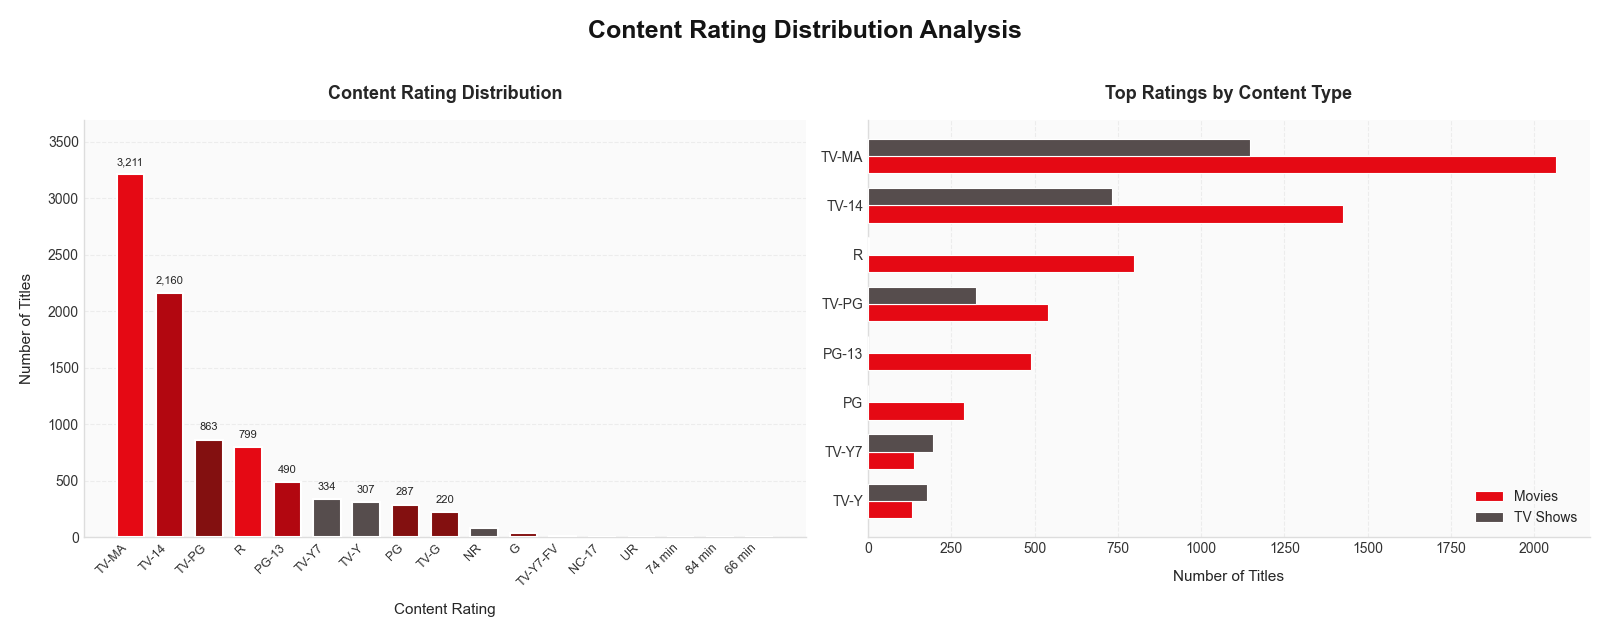


Most common rating: TV-MA (3,211 titles)
Adult content (TV-MA, R): 4,013 titles (45.6%)
Kids/Family content: 975 titles (11.1%)


In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Content Rating Distribution Analysis', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

rating_counts = df_clean['rating'].value_counts()

def get_rating_color(rating):
    adult = ['TV-MA', 'R', 'NC-17']
    teen = ['TV-14', 'PG-13']
    family = ['TV-PG', 'PG', 'TV-G', 'G']
    
    if rating in adult:
        return NETFLIX_RED
    elif rating in teen:
        return '#B20710'
    elif rating in family:
        return '#831010'
    else:
        return '#564D4D'

# Rating distribution
ax1 = axes[0]
colors = [get_rating_color(r) for r in rating_counts.index]
bars = ax1.bar(range(len(rating_counts)), rating_counts.values, color=colors, 
               edgecolor='white', linewidth=1.5, width=0.7, zorder=3)

ax1.set_xticks(range(len(rating_counts)))
ax1.set_xticklabels(rating_counts.index, rotation=45, ha='right', fontsize=9)
ax1.set_xlabel('Content Rating', fontsize=11, fontweight='medium')
ax1.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax1.set_title('Content Rating Distribution', fontsize=13, fontweight='bold', pad=15)
ax1.set_ylim(0, rating_counts.max() * 1.15)

for bar, val in zip(bars, rating_counts.values):
    if val > rating_counts.max() * 0.05:
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + rating_counts.max() * 0.02,
                 f'{val:,}', ha='center', va='bottom', fontsize=8, fontweight='medium')

ax1.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)
ax1.grid(axis='x', visible=False)

# Rating by content type
ax2 = axes[1]
rating_type = df_clean.groupby(['rating', 'type']).size().unstack(fill_value=0)

top_ratings = rating_type.sum(axis=1).nlargest(8).index
rating_type_top = rating_type.loc[top_ratings].sort_values(by='Movie', ascending=True)

y_pos = range(len(rating_type_top))
height = 0.35

bars1 = ax2.barh([p - height/2 for p in y_pos], rating_type_top['Movie'], height=height, 
                  color=NETFLIX_RED, edgecolor='white', linewidth=0.8, label='Movies', zorder=3)
bars2 = ax2.barh([p + height/2 for p in y_pos], rating_type_top['TV Show'], height=height, 
                  color='#564D4D', edgecolor='white', linewidth=0.8, label='TV Shows', zorder=3)

ax2.set_yticks(y_pos)
ax2.set_yticklabels(rating_type_top.index, fontsize=10)
ax2.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax2.set_title('Top Ratings by Content Type', fontsize=13, fontweight='bold', pad=15)
ax2.legend(loc='lower right', framealpha=0.9, fontsize=10)
ax2.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax2.grid(axis='y', visible=False)

plt.tight_layout()
plt.show()

adult_content = len(df_clean[df_clean['rating'].isin(['TV-MA', 'R', 'NC-17'])])
kids_content = len(df_clean[df_clean['rating'].isin(['TV-Y', 'TV-Y7', 'G', 'PG', 'TV-Y7-FV'])])

print(f"\nMost common rating: {rating_counts.index[0]} ({rating_counts.iloc[0]:,} titles)")
print(f"Adult content (TV-MA, R): {adult_content:,} titles ({adult_content/len(df_clean)*100:.1f}%)")
print(f"Kids/Family content: {kids_content:,} titles ({kids_content/len(df_clean)*100:.1f}%)")

### 5.6 Duration Analysis

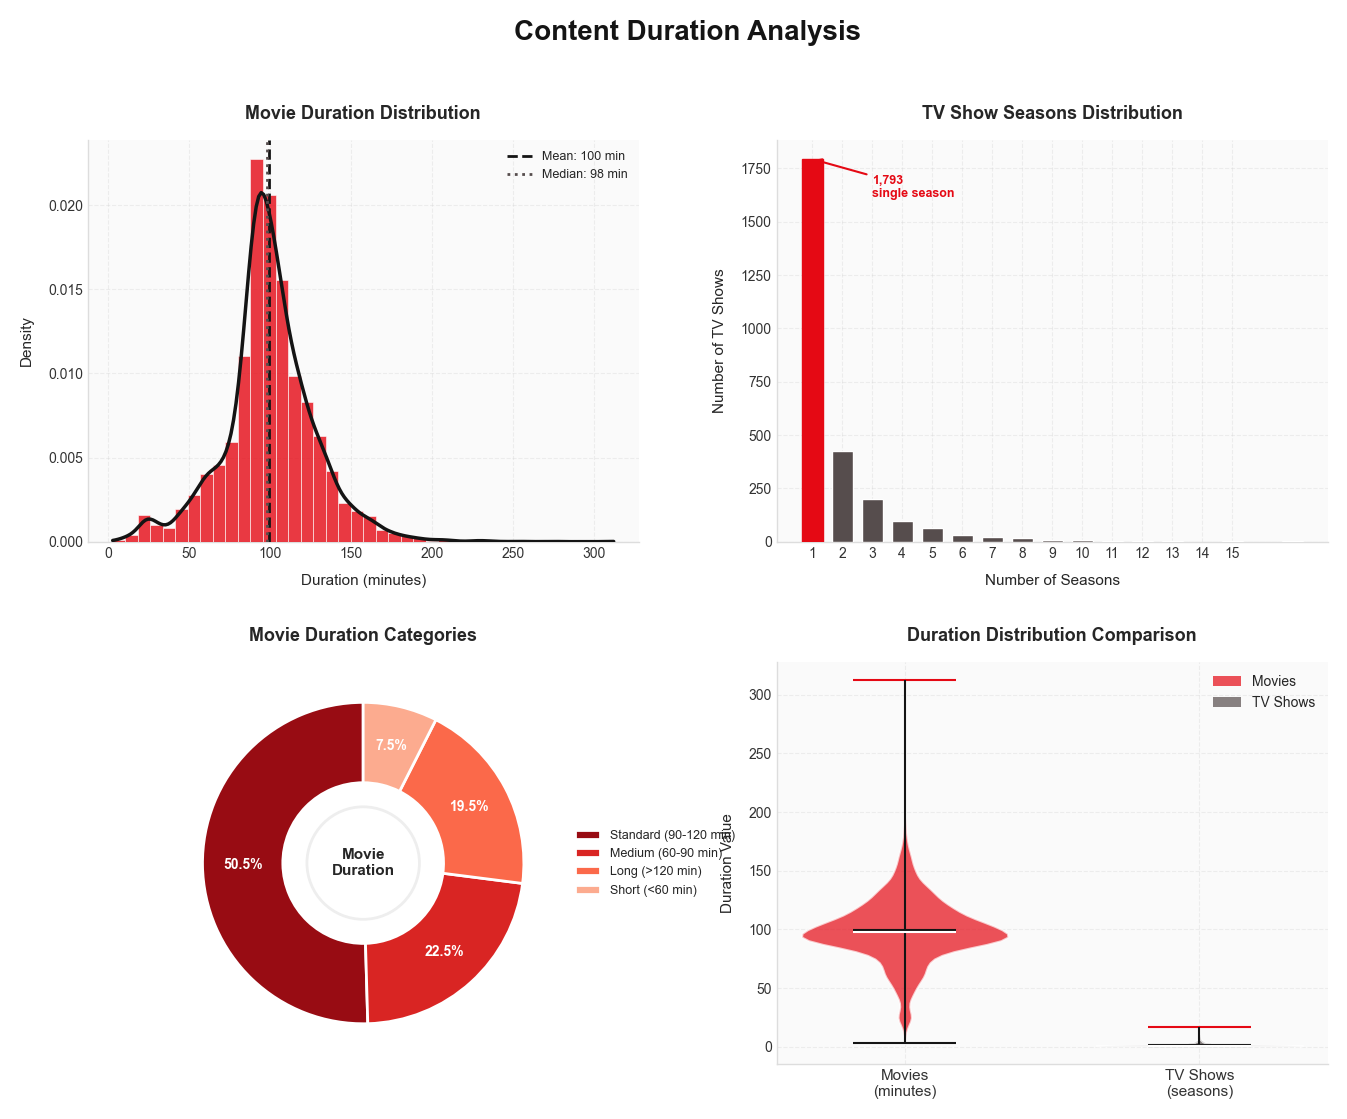


Movies: Mean 99.6 min | Median 98 min
TV Shows: Mean 1.8 seasons | Median 1 season
Single-season TV shows: 1,793 (67.0%)


In [49]:
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Content Duration Analysis', fontsize=20, fontweight='bold', color=NETFLIX_BLACK, y=0.98)

gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.25)

# Movie duration distribution
ax1 = fig.add_subplot(gs[0, 0])
movies = df_clean[df_clean['type'] == 'Movie']
movie_duration = movies['duration_value'].dropna()

ax1.hist(movie_duration, bins=40, color=NETFLIX_RED, edgecolor='white', 
         linewidth=0.5, alpha=0.8, density=True, zorder=3)

from scipy.stats import gaussian_kde
kde = gaussian_kde(movie_duration)
x_range = np.linspace(movie_duration.min(), movie_duration.max(), 200)
ax1.plot(x_range, kde(x_range), color='#141414', linewidth=2.5, zorder=4)

mean_val = movie_duration.mean()
median_val = movie_duration.median()
ax1.axvline(mean_val, color='#141414', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.0f} min', zorder=5)
ax1.axvline(median_val, color='#564D4D', linestyle=':', linewidth=2, label=f'Median: {median_val:.0f} min', zorder=5)

ax1.set_xlabel('Duration (minutes)', fontsize=11, fontweight='medium')
ax1.set_ylabel('Density', fontsize=11, fontweight='medium')
ax1.set_title('Movie Duration Distribution', fontsize=13, fontweight='bold', pad=15)
ax1.legend(loc='upper right', framealpha=0.9, fontsize=9)
ax1.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)

# TV Show seasons distribution
ax2 = fig.add_subplot(gs[0, 1])
tv_shows = df_clean[df_clean['type'] == 'TV Show']
tv_duration = tv_shows['duration_value'].dropna()

season_counts = tv_duration.value_counts().sort_index().head(15)
bars = ax2.bar(season_counts.index.astype(int), season_counts.values, color='#564D4D', 
               edgecolor='white', linewidth=1, width=0.7, zorder=3)
bars[0].set_color(NETFLIX_RED)

ax2.set_xlabel('Number of Seasons', fontsize=11, fontweight='medium')
ax2.set_ylabel('Number of TV Shows', fontsize=11, fontweight='medium')
ax2.set_title('TV Show Seasons Distribution', fontsize=13, fontweight='bold', pad=15)
ax2.set_xticks(range(1, 16))
ax2.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)

ax2.annotate(f'{int(season_counts.iloc[0]):,}\nsingle season', 
             xy=(1, season_counts.iloc[0]), xytext=(3, season_counts.iloc[0] * 0.9),
             fontsize=9, fontweight='bold', color=NETFLIX_RED,
             arrowprops=dict(arrowstyle='->', color=NETFLIX_RED, lw=1.5))

# Movie duration categories
ax3 = fig.add_subplot(gs[1, 0])
duration_cat_counts = movies['duration_category'].value_counts()
duration_cat_counts = duration_cat_counts[duration_cat_counts.index != 'Unknown']

colors_cat = plt.cm.Reds(np.linspace(0.3, 0.9, len(duration_cat_counts)))[::-1]
wedges, texts, autotexts = ax3.pie(duration_cat_counts.values, labels=None, autopct='%1.1f%%',
                                    colors=colors_cat, startangle=90, pctdistance=0.75,
                                    wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2))

for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

centre_circle = plt.Circle((0, 0), 0.35, fc='white', ec='#EEEEEE', linewidth=2)
ax3.add_artist(centre_circle)
ax3.text(0, 0, 'Movie\nDuration', ha='center', va='center', fontsize=11, fontweight='bold')
ax3.legend(wedges, duration_cat_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
ax3.set_title('Movie Duration Categories', fontsize=13, fontweight='bold', pad=15)

# Violin plot comparison
ax4 = fig.add_subplot(gs[1, 1])

parts = ax4.violinplot([movie_duration, tv_duration], positions=[1, 2], 
                        showmeans=True, showmedians=True, showextrema=True, widths=0.7)

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(NETFLIX_RED if i == 0 else '#564D4D')
    pc.set_edgecolor('white')
    pc.set_alpha(0.7)
    pc.set_linewidth(1.5)

if 'cmeans' in parts:
    parts['cmeans'].set_color('#141414')
if 'cmedians' in parts:
    parts['cmedians'].set_color('white')
if 'cbars' in parts:
    parts['cbars'].set_color('#141414')
if 'cmins' in parts:
    parts['cmins'].set_color('#141414')
if 'cmaxs' in parts:
    parts['cmaxs'].set_color('#141414')

ax4.set_xticks([1, 2])
ax4.set_xticklabels(['Movies\n(minutes)', 'TV Shows\n(seasons)'], fontsize=11)
ax4.set_ylabel('Duration Value', fontsize=11, fontweight='medium')
ax4.set_title('Duration Distribution Comparison', fontsize=13, fontweight='bold', pad=15)
ax4.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=NETFLIX_RED, alpha=0.7, label='Movies'),
                   Patch(facecolor='#564D4D', alpha=0.7, label='TV Shows')]
ax4.legend(handles=legend_elements, loc='upper right', framealpha=0.9)

plt.tight_layout()
plt.show()

print(f"\nMovies: Mean {movie_duration.mean():.1f} min | Median {movie_duration.median():.0f} min")
print(f"TV Shows: Mean {tv_duration.mean():.1f} seasons | Median {tv_duration.median():.0f} season")
print(f"Single-season TV shows: {int(season_counts.iloc[0]):,} ({season_counts.iloc[0]/len(tv_shows)*100:.1f}%)")

### 5.7 Release Year Analysis

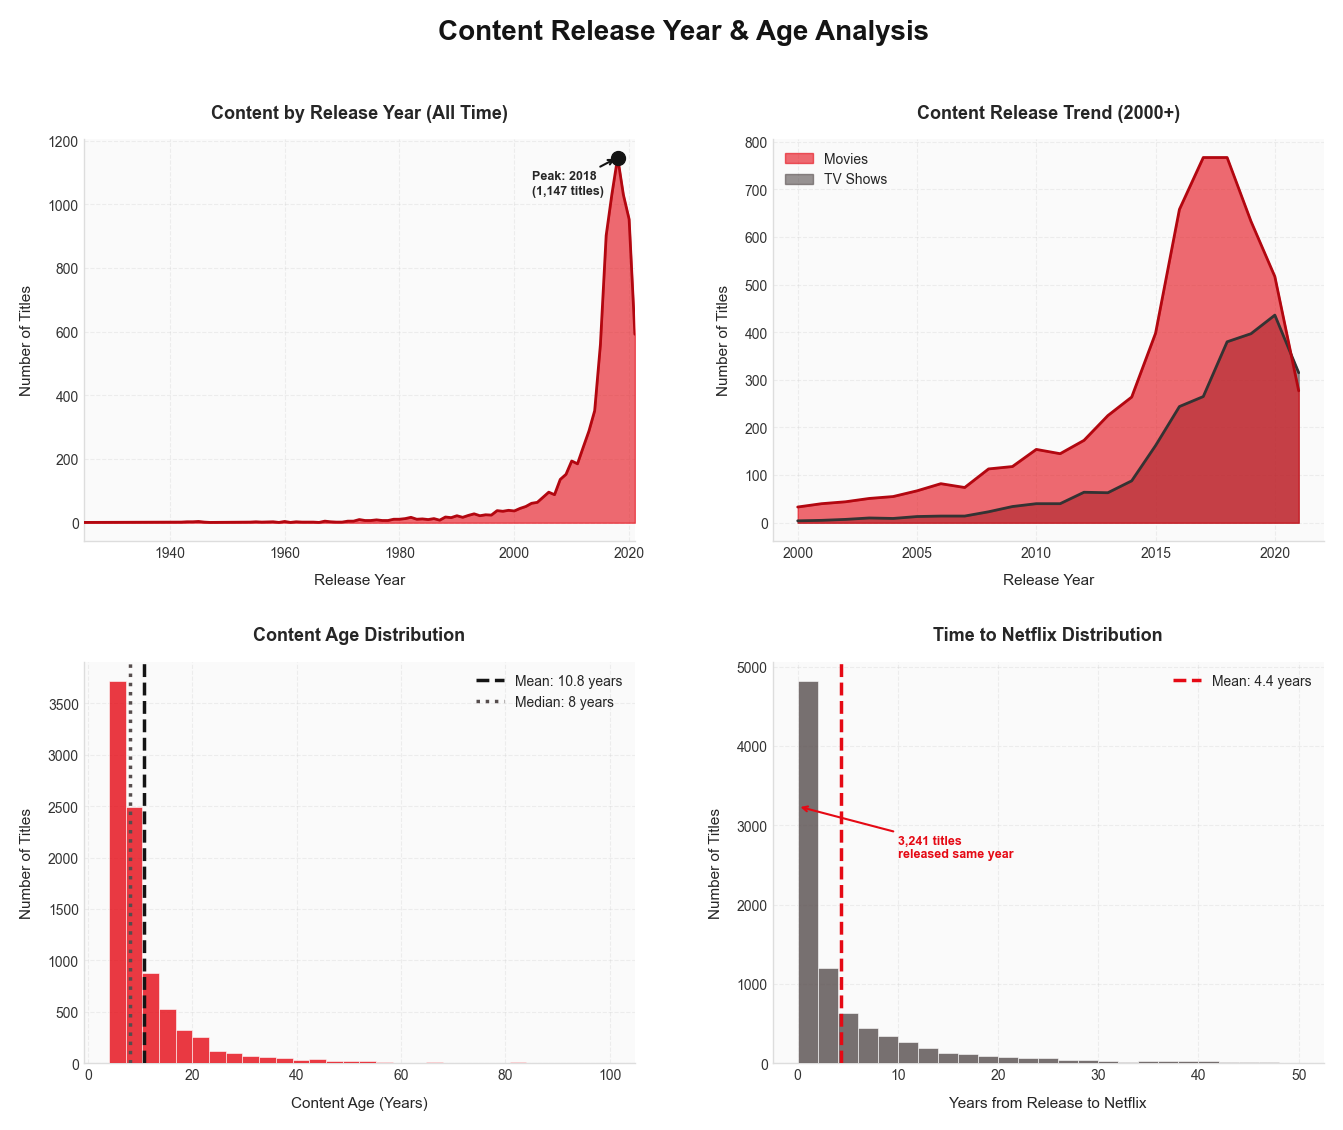


Oldest content: 1925
Newest content: 2021
Peak release year: 2018 (1,147 titles)
Average content age: 10.8 years


In [50]:
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Content Release Year & Age Analysis', fontsize=20, fontweight='bold', color=NETFLIX_BLACK, y=0.98)

gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.25)

# Release year distribution
ax1 = fig.add_subplot(gs[0, 0])
release_year_counts = df_clean['release_year'].value_counts().sort_index()

ax1.fill_between(release_year_counts.index, release_year_counts.values, alpha=0.6, color=NETFLIX_RED, zorder=3)
ax1.plot(release_year_counts.index, release_year_counts.values, color='#B20710', linewidth=2, zorder=4)

peak_year = release_year_counts.idxmax()
peak_val = release_year_counts.max()
ax1.scatter([peak_year], [peak_val], color=NETFLIX_BLACK, s=100, zorder=5)
ax1.annotate(f'Peak: {peak_year}\n({peak_val:,} titles)', xy=(peak_year, peak_val), 
             xytext=(peak_year - 15, peak_val * 0.9), fontsize=9, fontweight='bold',
             arrowprops=dict(arrowstyle='->', color=NETFLIX_BLACK, lw=1.5))

ax1.set_xlabel('Release Year', fontsize=11, fontweight='medium')
ax1.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax1.set_title('Content by Release Year (All Time)', fontsize=13, fontweight='bold', pad=15)
ax1.grid(axis='both', alpha=0.3, linestyle='--', zorder=0)
ax1.set_xlim(release_year_counts.index.min(), release_year_counts.index.max())

# Release year by content type (2000+)
ax2 = fig.add_subplot(gs[0, 1])
release_type = df_clean.groupby(['release_year', 'type']).size().unstack(fill_value=0)
release_type = release_type[release_type.index >= 2000]

ax2.fill_between(release_type.index, release_type['Movie'], alpha=0.6, color=NETFLIX_RED, label='Movies', zorder=3)
ax2.fill_between(release_type.index, release_type['TV Show'], alpha=0.6, color='#564D4D', label='TV Shows', zorder=2)
ax2.plot(release_type.index, release_type['Movie'], color='#B20710', linewidth=2, zorder=4)
ax2.plot(release_type.index, release_type['TV Show'], color='#333333', linewidth=2, zorder=3)

ax2.set_xlabel('Release Year', fontsize=11, fontweight='medium')
ax2.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax2.set_title('Content Release Trend (2000+)', fontsize=13, fontweight='bold', pad=15)
ax2.legend(loc='upper left', framealpha=0.9, fontsize=10)
ax2.grid(axis='both', alpha=0.3, linestyle='--', zorder=0)

# Content age distribution
ax3 = fig.add_subplot(gs[1, 0])
content_age = df_clean['content_age']

ax3.hist(content_age, bins=30, color=NETFLIX_RED, edgecolor='white', linewidth=0.5, alpha=0.8, zorder=3)
ax3.axvline(content_age.mean(), color='#141414', linestyle='--', linewidth=2.5, 
            label=f'Mean: {content_age.mean():.1f} years', zorder=4)
ax3.axvline(content_age.median(), color='#564D4D', linestyle=':', linewidth=2.5, 
            label=f'Median: {content_age.median():.0f} years', zorder=4)

ax3.set_xlabel('Content Age (Years)', fontsize=11, fontweight='medium')
ax3.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax3.set_title('Content Age Distribution', fontsize=13, fontweight='bold', pad=15)
ax3.legend(loc='upper right', framealpha=0.9, fontsize=10)
ax3.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)

# Time to Netflix distribution
ax4 = fig.add_subplot(gs[1, 1])
time_to_netflix = df_clean['time_to_netflix'].dropna()
time_to_netflix = time_to_netflix[(time_to_netflix >= 0) & (time_to_netflix <= 50)]

ax4.hist(time_to_netflix, bins=25, color='#564D4D', edgecolor='white', linewidth=0.5, alpha=0.8, zorder=3)
ax4.axvline(time_to_netflix.mean(), color=NETFLIX_RED, linestyle='--', linewidth=2.5, 
            label=f'Mean: {time_to_netflix.mean():.1f} years', zorder=4)

same_year = (time_to_netflix == 0).sum()
ax4.annotate(f'{same_year:,} titles\nreleased same year', xy=(0, same_year), 
             xytext=(10, same_year * 0.8), fontsize=9, fontweight='bold', color=NETFLIX_RED,
             arrowprops=dict(arrowstyle='->', color=NETFLIX_RED, lw=1.5))

ax4.set_xlabel('Years from Release to Netflix', fontsize=11, fontweight='medium')
ax4.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax4.set_title('Time to Netflix Distribution', fontsize=13, fontweight='bold', pad=15)
ax4.legend(loc='upper right', framealpha=0.9, fontsize=10)
ax4.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)

plt.tight_layout()
plt.show()

print(f"\nOldest content: {df_clean['release_year'].min()}")
print(f"Newest content: {df_clean['release_year'].max()}")
print(f"Peak release year: {peak_year} ({peak_val:,} titles)")
print(f"Average content age: {content_age.mean():.1f} years")

### 5.8 Top Directors & Cast Analysis

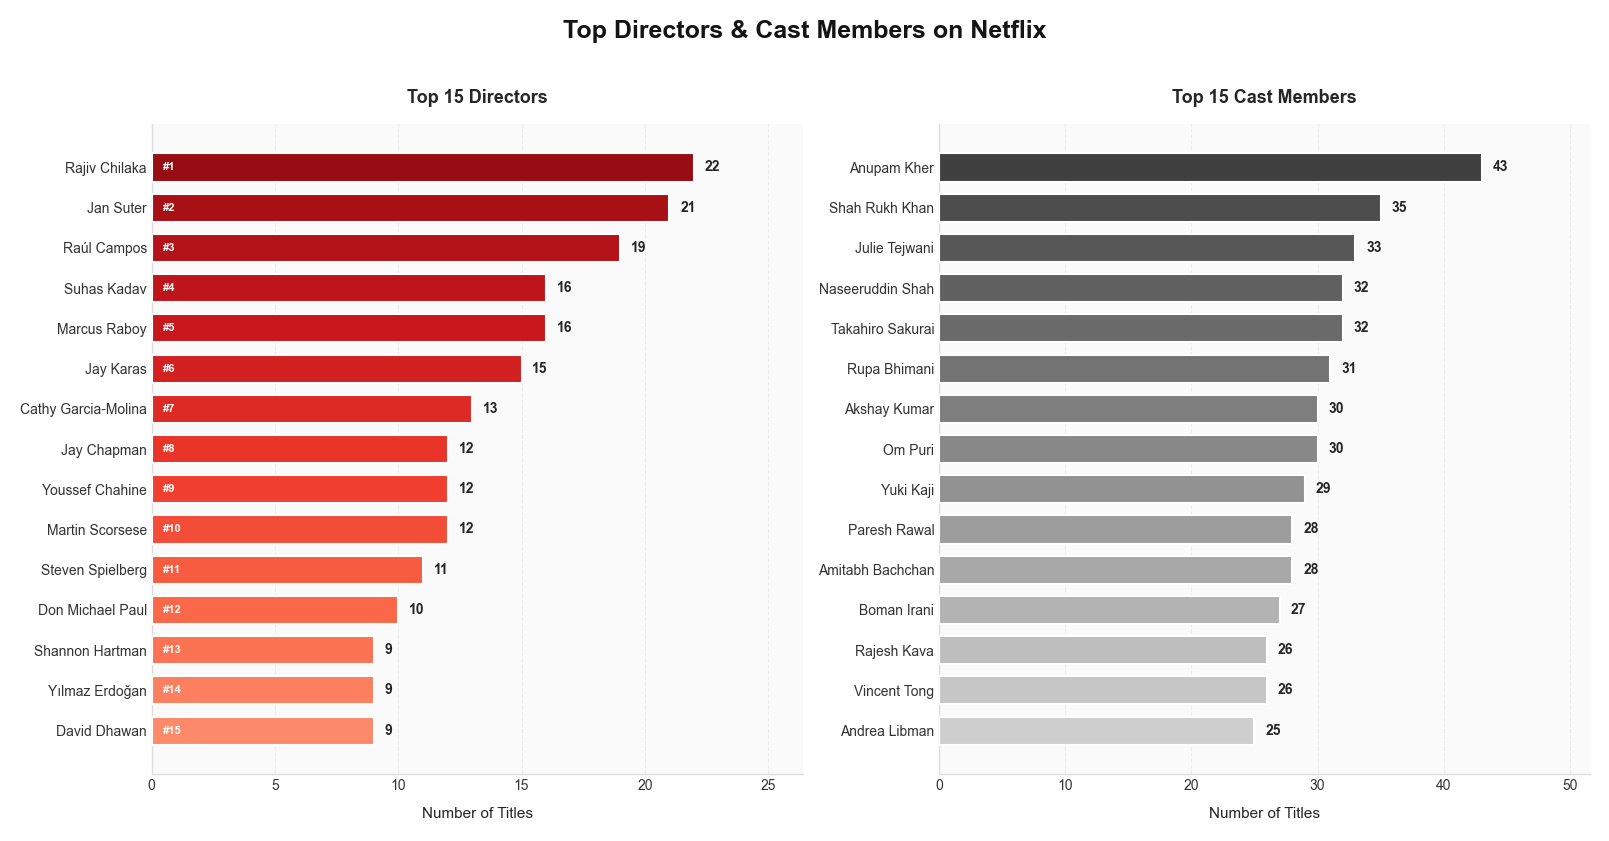


Total unique directors: 4,993
Total unique cast members: 36,439
Most prolific director: Rajiv Chilaka (22 titles)
Most featured actor: Anupam Kher (43 titles)


In [51]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Top Directors & Cast Members on Netflix', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

# Top 15 directors
ax1 = axes[0]
directors = df_clean['director'].str.split(', ').explode()
director_counts = directors[directors != 'Unknown'].value_counts().head(15)

colors_gradient = plt.cm.Reds(np.linspace(0.9, 0.4, len(director_counts)))
bars1 = ax1.barh(range(len(director_counts)), director_counts.values, color=colors_gradient, 
                  edgecolor='white', linewidth=1.5, height=0.7, zorder=3)
ax1.set_yticks(range(len(director_counts)))
ax1.set_yticklabels(director_counts.index, fontsize=10)
ax1.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax1.set_title('Top 15 Directors', fontsize=13, fontweight='bold', pad=15)
ax1.invert_yaxis()
ax1.set_xlim(0, director_counts.max() * 1.2)

for i, (bar, val) in enumerate(zip(bars1, director_counts.values)):
    ax1.text(val + director_counts.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val}', va='center', ha='left', fontsize=10, fontweight='bold')
    ax1.text(director_counts.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'#{i+1}', va='center', ha='left', fontsize=8, fontweight='bold', 
             color='white', bbox=dict(boxstyle='circle', facecolor=colors_gradient[i], edgecolor='none', pad=0.3))

ax1.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax1.grid(axis='y', visible=False)

# Top 15 cast members
ax2 = axes[1]
cast_members = df_clean['cast'].str.split(', ').explode()
cast_counts = cast_members[cast_members != 'Unknown'].value_counts().head(15)

colors_gradient2 = plt.cm.Greys(np.linspace(0.8, 0.3, len(cast_counts)))
bars2 = ax2.barh(range(len(cast_counts)), cast_counts.values, color=colors_gradient2, 
                  edgecolor='white', linewidth=1.5, height=0.7, zorder=3)
ax2.set_yticks(range(len(cast_counts)))
ax2.set_yticklabels(cast_counts.index, fontsize=10)
ax2.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax2.set_title('Top 15 Cast Members', fontsize=13, fontweight='bold', pad=15)
ax2.invert_yaxis()
ax2.set_xlim(0, cast_counts.max() * 1.2)

for i, (bar, val) in enumerate(zip(bars2, cast_counts.values)):
    ax2.text(val + cast_counts.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val}', va='center', ha='left', fontsize=10, fontweight='bold')

ax2.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax2.grid(axis='y', visible=False)

plt.tight_layout()
plt.show()

print(f"\nTotal unique directors: {len(directors[directors != 'Unknown'].unique()):,}")
print(f"Total unique cast members: {len(cast_members[cast_members != 'Unknown'].unique()):,}")
print(f"Most prolific director: {director_counts.index[0]} ({director_counts.iloc[0]} titles)")
print(f"Most featured actor: {cast_counts.index[0]} ({cast_counts.iloc[0]} titles)")

### 5.9 Correlation Analysis

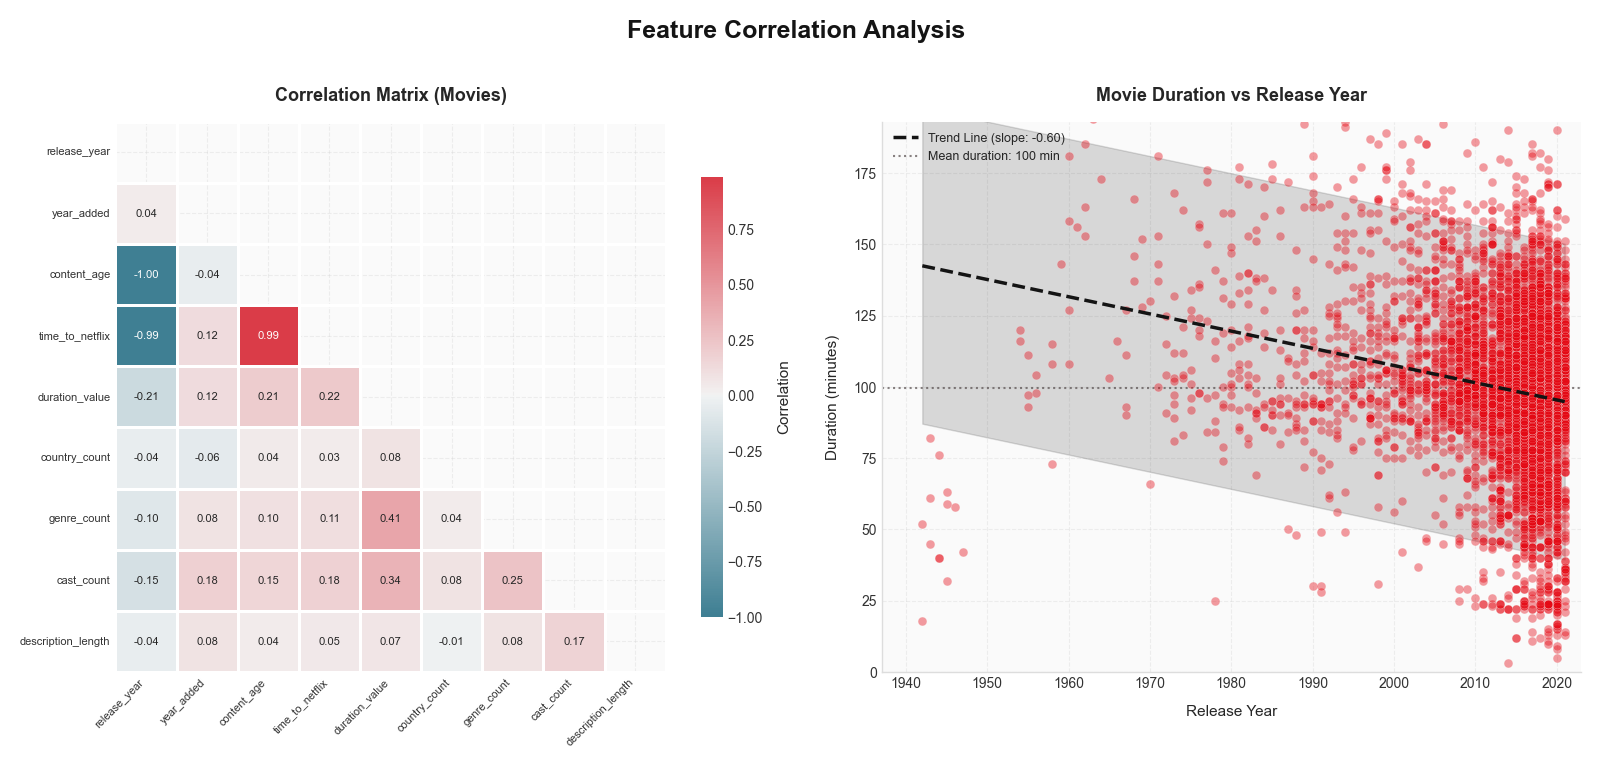


Release Year & Content Age correlation: -1.000
Genre Count & Cast Count correlation: 0.252
Duration trend: -0.60 min/year


In [52]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Feature Correlation Analysis', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

numerical_cols = ['release_year', 'year_added', 'content_age', 'time_to_netflix', 
                  'duration_value', 'country_count', 'genre_count', 'cast_count', 'description_length']

movies_num = df_clean[df_clean['type'] == 'Movie'][numerical_cols].dropna()

# Correlation heatmap
ax1 = axes[0]
corr_matrix = movies_num.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=cmap, center=0, 
            fmt='.2f', ax=ax1, linewidths=1, linecolor='white',
            cbar_kws={'shrink': 0.8, 'label': 'Correlation'},
            annot_kws={'size': 8, 'weight': 'medium'},
            square=True)

ax1.set_title('Correlation Matrix (Movies)', fontsize=13, fontweight='bold', pad=15)
ax1.tick_params(axis='both', labelsize=8, rotation=45)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(ax1.yaxis.get_majorticklabels(), rotation=0)

# Scatter plot: Release Year vs Duration
ax2 = axes[1]
movies_scatter = movies[['release_year', 'duration_value']].dropna()

scatter = ax2.scatter(movies_scatter['release_year'], movies_scatter['duration_value'], 
                       alpha=0.4, c=NETFLIX_RED, edgecolor='white', linewidth=0.3, s=40, zorder=3)

# Trend line
z = np.polyfit(movies_scatter['release_year'], movies_scatter['duration_value'], 1)
p = np.poly1d(z)
x_line = np.linspace(movies_scatter['release_year'].min(), movies_scatter['release_year'].max(), 100)
ax2.plot(x_line, p(x_line), color='#141414', linestyle='--', linewidth=2.5, 
         label=f'Trend Line (slope: {z[0]:.2f})', zorder=4)

y_pred = p(movies_scatter['release_year'])
residuals = movies_scatter['duration_value'] - y_pred
std_err = np.std(residuals)
ax2.fill_between(x_line, p(x_line) - 2*std_err, p(x_line) + 2*std_err, 
                  alpha=0.15, color='#141414', zorder=2)

ax2.axhline(movies_scatter['duration_value'].mean(), color='#564D4D', linestyle=':', 
            linewidth=1.5, alpha=0.7, label=f'Mean duration: {movies_scatter["duration_value"].mean():.0f} min')

ax2.set_xlabel('Release Year', fontsize=11, fontweight='medium')
ax2.set_ylabel('Duration (minutes)', fontsize=11, fontweight='medium')
ax2.set_title('Movie Duration vs Release Year', fontsize=13, fontweight='bold', pad=15)
ax2.legend(loc='upper left', framealpha=0.9, fontsize=9)
ax2.grid(axis='both', alpha=0.3, linestyle='--', zorder=0)

ax2.set_xlim(movies_scatter['release_year'].min() - 5, movies_scatter['release_year'].max() + 2)
ax2.set_ylim(0, movies_scatter['duration_value'].quantile(0.99) * 1.1)

plt.tight_layout()
plt.show()

print(f"\nRelease Year & Content Age correlation: {corr_matrix.loc['release_year', 'content_age']:.3f}")
print(f"Genre Count & Cast Count correlation: {corr_matrix.loc['genre_count', 'cast_count']:.3f}")
print(f"Duration trend: {z[0]:+.2f} min/year")

---
## 6. Hypothesis Testing

### Statistical Analysis to validate our observations with significance tests

In [53]:
alpha = 0.05

# Hypothesis 1: Release year difference between Movies and TV Shows
print("=" * 70)
print("HYPOTHESIS 1: Release Year Difference between Movies and TV Shows")
print("=" * 70)
print("H0: No significant difference in release years between Movies and TV Shows")
print("H1: Significant difference in release years between Movies and TV Shows")

movies_years = df_clean[df_clean['type'] == 'Movie']['release_year']
tv_years = df_clean[df_clean['type'] == 'TV Show']['release_year']

t_stat, p_value = stats.ttest_ind(movies_years, tv_years)

print(f"\nMovies - Mean Release Year: {movies_years.mean():.2f}")
print(f"TV Shows - Mean Release Year: {tv_years.mean():.2f}")
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < alpha:
    print(f"\nResult: Reject H0 (p < {alpha}) - Significant difference exists")
else:
    print(f"\nResult: Fail to Reject H0 (p >= {alpha}) - No significant difference")

HYPOTHESIS 1: Release Year Difference between Movies and TV Shows
H0: No significant difference in release years between Movies and TV Shows
H1: Significant difference in release years between Movies and TV Shows

Movies - Mean Release Year: 2013.12
TV Shows - Mean Release Year: 2016.61

t-statistic: -17.3394
p-value: 0.000000

Result: Reject H0 (p < 0.05) - Significant difference exists


In [54]:
# Hypothesis 2: Netflix's focus shift - TV Shows vs Movies
print("\n" + "=" * 70)
print("HYPOTHESIS 2: Netflix's Recent Focus - TV Shows vs Movies")
print("=" * 70)
print("H0: TV Show proportion is same in recent years (2019-2021) as earlier (2015-2018)")
print("H1: TV Show proportion differs between periods")

recent = df_clean[(df_clean['year_added'] >= 2019) & (df_clean['year_added'] <= 2021)]
earlier = df_clean[(df_clean['year_added'] >= 2015) & (df_clean['year_added'] <= 2018)]

recent_tv_prop = len(recent[recent['type'] == 'TV Show']) / len(recent)
earlier_tv_prop = len(earlier[earlier['type'] == 'TV Show']) / len(earlier)

contingency_table = pd.crosstab(
    df_clean[(df_clean['year_added'] >= 2015) & (df_clean['year_added'] <= 2021)]['year_added'].apply(
        lambda x: 'Recent (2019-2021)' if x >= 2019 else 'Earlier (2015-2018)'
    ),
    df_clean[(df_clean['year_added'] >= 2015) & (df_clean['year_added'] <= 2021)]['type']
)

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nTV Show proportion (Earlier 2015-2018): {earlier_tv_prop:.2%}")
print(f"TV Show proportion (Recent 2019-2021): {recent_tv_prop:.2%}")
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")

if p_value < alpha:
    print(f"\nResult: Reject H0 (p < {alpha}) - Netflix has shifted focus towards TV Shows")
else:
    print(f"\nResult: Fail to Reject H0 (p >= {alpha}) - No significant shift in content focus")


HYPOTHESIS 2: Netflix's Recent Focus - TV Shows vs Movies
H0: TV Show proportion is same in recent years (2019-2021) as earlier (2015-2018)
H1: TV Show proportion differs between periods

TV Show proportion (Earlier 2015-2018): 28.76%
TV Show proportion (Recent 2019-2021): 31.50%

Chi-square statistic: 7.1858
p-value: 0.007348
Degrees of freedom: 1

Result: Reject H0 (p < 0.05) - Netflix has shifted focus towards TV Shows


In [55]:
# Hypothesis 3: Association between Content Rating and Content Type
print("\n" + "=" * 70)
print("HYPOTHESIS 3: Association between Rating and Content Type")
print("=" * 70)
print("H0: Content Rating and Content Type are independent")
print("H1: Content Rating and Content Type are associated")

rating_type_table = pd.crosstab(df_clean['rating'], df_clean['type'])
print("\nContingency Table:")
print(rating_type_table)

chi2, p_value, dof, expected = stats.chi2_contingency(rating_type_table)

print(f"\nChi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.2e}")
print(f"Degrees of freedom: {dof}")

if p_value < alpha:
    print(f"\nResult: Reject H0 (p < {alpha}) - Rating and Type are significantly associated")
else:
    print(f"\nResult: Fail to Reject H0 (p >= {alpha}) - Rating and Type are independent")


HYPOTHESIS 3: Association between Rating and Content Type
H0: Content Rating and Content Type are independent
H1: Content Rating and Content Type are associated

Contingency Table:
type      Movie  TV Show
rating                  
66 min        1        0
74 min        1        0
84 min        1        0
G            41        0
NC-17         3        0
NR           75        5
PG          287        0
PG-13       490        0
R           797        2
TV-14      1427      733
TV-G        126       94
TV-MA      2064     1147
TV-PG       540      323
TV-Y        131      176
TV-Y7       139      195
TV-Y7-FV      5        1
UR            3        0

Chi-square statistic: 1047.8628
p-value: 6.28e-213
Degrees of freedom: 16

Result: Reject H0 (p < 0.05) - Rating and Type are significantly associated


In [56]:
# Hypothesis 4: US content dominance
print("\n" + "=" * 70)
print("HYPOTHESIS 4: US Content Dominance")
print("=" * 70)
print("H0: US content proportion equals expected if evenly distributed")
print("H1: US content proportion is significantly higher than expected")

us_count = len(df_clean[df_clean['primary_country'] == 'United States'])
total_count = len(df_clean[df_clean['primary_country'] != 'Unknown'])
us_proportion = us_count / total_count

n_countries = df_clean['primary_country'].nunique()
expected_proportion = 1 / n_countries

z_stat = (us_proportion - expected_proportion) / np.sqrt(expected_proportion * (1 - expected_proportion) / total_count)
p_value = 1 - stats.norm.cdf(z_stat)

print(f"\nUS Content: {us_count} titles ({us_proportion:.2%})")
print(f"Expected if even distribution: {expected_proportion:.2%}")
print(f"\nZ-statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.2e}")

if p_value < alpha:
    print(f"\nResult: Reject H0 (p < {alpha}) - US content is significantly over-represented")
else:
    print(f"\nResult: Fail to Reject H0 (p >= {alpha}) - US content proportion not significantly different")


HYPOTHESIS 4: US Content Dominance
H0: US content proportion equals expected if evenly distributed
H1: US content proportion is significantly higher than expected

US Content: 3211 titles (40.26%)
Expected if even distribution: 1.15%

Z-statistic: 327.6707
p-value: 0.00e+00

Result: Reject H0 (p < 0.05) - US content is significantly over-represented


In [57]:
# Hypothesis testing summary
print("\n" + "=" * 70)
print("HYPOTHESIS TESTING SUMMARY")
print("=" * 70)

summary_data = {
    'Hypothesis': [
        'H1: Release Year Difference (Movies vs TV)',
        'H2: Netflix Focus Shift (TV Shows)',
        'H3: Rating-Type Association',
        'H4: US Content Dominance'
    ],
    'Test Used': [
        "Independent t-test",
        "Chi-square test",
        "Chi-square test",
        "Z-test (proportion)"
    ],
    'Result': [
        'Significant' if stats.ttest_ind(movies_years, tv_years)[1] < 0.05 else 'Not Significant',
        'Significant' if stats.chi2_contingency(contingency_table)[1] < 0.05 else 'Not Significant',
        'Significant' if stats.chi2_contingency(rating_type_table)[1] < 0.05 else 'Not Significant',
        'Significant' if p_value < 0.05 else 'Not Significant'
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df


HYPOTHESIS TESTING SUMMARY


,Hypothesis,Test Used,Result
0,H1: Release Year Difference (Movies vs TV),Independent t-test,Significant
1,H2: Netflix Focus Shift (TV Shows),Chi-square test,Significant
2,H3: Rating-Type Association,Chi-square test,Significant
3,H4: US Content Dominance,Z-test (proportion),Significant


---
## 7. Content-Based Recommendation System

Building a recommendation system using TF-IDF vectorization and cosine similarity based on content features.

In [58]:
df_rec = df_clean.copy()

def create_soup(row):
    """Combine relevant features into a single string for TF-IDF vectorization."""
    features = []
    
    # Genres (weighted by repetition)
    if pd.notna(row['listed_in']):
        genres = row['listed_in'].replace(',', ' ').replace(' ', '')
        features.append(genres + ' ' + genres)
    
    if row['director'] != 'Unknown':
        director = row['director'].replace(',', ' ').replace(' ', '')
        features.append(director)
    
    if row['cast'] != 'Unknown':
        cast = ' '.join(row['cast'].split(',')[:3]).replace(' ', '')
        features.append(cast)
    
    if row['primary_country'] != 'Unknown':
        country = row['primary_country'].replace(' ', '')
        features.append(country)
    
    features.append(str(row['rating']).replace('-', ''))
    
    if pd.notna(row['description']):
        features.append(row['description'])
    
    return ' '.join(features).lower()

df_rec['soup'] = df_rec.apply(create_soup, axis=1)

print("Combined features created for each title")
print(f"\nSample 'soup' for '{df_rec.iloc[0]['title']}':")
print(df_rec.iloc[0]['soup'][:500] + "...")

Combined features created for each title

Sample 'soup' for 'Dick Johnson Is Dead':
documentaries documentaries kirstenjohnson unitedstates pg13 as her father nears the end of his life, filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable....


In [59]:
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1, 2)
)

tfidf_matrix = tfidf.fit_transform(df_rec['soup'])
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
print(f"  - {tfidf_matrix.shape[0]} titles")
print(f"  - {tfidf_matrix.shape[1]} features")

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(f"\nCosine Similarity Matrix Shape: {cosine_sim.shape}")

TF-IDF Matrix Shape: (8807, 5000)
  - 8807 titles
  - 5000 features

Cosine Similarity Matrix Shape: (8807, 8807)


In [60]:
indices = pd.Series(df_rec.index, index=df_rec['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    """
    Get content recommendations based on cosine similarity.
    
    Parameters
    ----------
    title : str
        The title of the movie/TV show
    cosine_sim : array
        Cosine similarity matrix
    top_n : int
        Number of recommendations to return
    
    Returns
    -------
    DataFrame with recommended titles and their details
    """
    if title not in indices:
        print(f"'{title}' not found in the dataset.")
        similar_titles = df_rec[df_rec['title'].str.contains(title, case=False, na=False)]['title'].head(5)
        if len(similar_titles) > 0:
            print(f"Did you mean one of these?\n{similar_titles.tolist()}")
        return None
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    
    title_indices = [i[0] for i in sim_scores]
    
    recommendations = df_rec.iloc[title_indices][['title', 'type', 'listed_in', 'rating', 
                                                    'release_year', 'primary_country', 'description']].copy()
    recommendations['similarity_score'] = [round(i[1], 4) for i in sim_scores]
    
    return recommendations

print("Recommendation function created successfully.")

Recommendation function created successfully.


### 7.1 Test the Recommendation System

In [61]:
test_titles = ['Stranger Things', 'The Crown', 'Breaking Bad', 'Money Heist']

for test_title in test_titles:
    print("\n" + "=" * 80)
    print(f"Recommendations for: '{test_title}'")
    print("=" * 80)
    
    if test_title in indices:
        original = df_rec[df_rec['title'] == test_title][['title', 'type', 'listed_in', 'rating', 'release_year']].iloc[0]
        print(f"Original: {original['type']} | {original['listed_in']} | {original['rating']} | {original['release_year']}")
        print("-" * 80)
    
    recommendations = get_recommendations(test_title, top_n=5)
    if recommendations is not None:
        display(recommendations[['title', 'type', 'listed_in', 'rating', 'similarity_score']])


Recommendations for: 'Stranger Things'
Original: TV Show | TV Horror, TV Mysteries, TV Sci-Fi & Fantasy | TV-14 | 2019
--------------------------------------------------------------------------------


,title,type,listed_in,rating,similarity_score
3187,Nightflyers,TV Show,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy",TV-MA,0.5624
6953,Helix,TV Show,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy",TV-MA,0.5534
1473,Chilling Adventures of Sabrina,TV Show,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy",TV-14,0.5436
8083,Star-Crossed,TV Show,"Romantic TV Shows, TV Dramas, TV Sci-Fi & Fantasy",TV-14,0.3043
3236,Once Upon A Time In Lingjian Mountain,TV Show,"International TV Shows, TV Comedies, TV Sci-Fi...",TV-14,0.2844



Recommendations for: 'The Crown'
Original: TV Show | British TV Shows, International TV Shows, TV Dramas | TV-MA | 2020
--------------------------------------------------------------------------------


,title,type,listed_in,rating,similarity_score
789,Downton Abbey,TV Show,"British TV Shows, International TV Shows, TV D...",TV-14,0.4028
1998,Call the Midwife,TV Show,"British TV Shows, International TV Shows, TV D...",TV-MA,0.3776
538,The A List,TV Show,"British TV Shows, International TV Shows, TV D...",TV-PG,0.3354
3969,Traitors,TV Show,"British TV Shows, International TV Shows, TV D...",TV-MA,0.3292
3045,Dracula,TV Show,"British TV Shows, International TV Shows, TV D...",TV-14,0.3220



Recommendations for: 'Breaking Bad'
Original: TV Show | Crime TV Shows, TV Dramas, TV Thrillers | TV-MA | 2013
--------------------------------------------------------------------------------


,title,type,listed_in,rating,similarity_score
1477,Dare Me,TV Show,"Crime TV Shows, TV Dramas, TV Thrillers",TV-MA,0.5114
8397,The Lizzie Borden Chronicles,TV Show,"Crime TV Shows, TV Dramas, TV Thrillers",TV-14,0.4992
2767,Ozark,TV Show,"Crime TV Shows, TV Dramas, TV Thrillers",TV-MA,0.4747
678,The Assassination of Gianni Versace,TV Show,"Crime TV Shows, TV Dramas, TV Thrillers",TV-MA,0.4152
1980,The Blacklist,TV Show,"Crime TV Shows, TV Dramas, TV Thrillers",TV-14,0.3892



Recommendations for: 'Money Heist'
'Money Heist' not found in the dataset.
Did you mean one of these?
['Money Heist: From Tokyo to Berlin', 'Money Heist: The Phenomenon']


### 7.2 Interactive Recommendation Function

In [62]:
def recommend_netflix(title, show_details=True):
    """
    User-friendly function to get Netflix recommendations.
    
    Parameters
    ----------
    title : str
        Title of the movie/TV show you liked
    show_details : bool
        Whether to show detailed information
    """
    print("\n" + "=" * 60)
    print(f"NETFLIX RECOMMENDATIONS FOR: '{title.upper()}'")
    print("=" * 60)
    
    recommendations = get_recommendations(title, top_n=10)
    
    if recommendations is not None:
        print(f"\nTop 10 Similar Titles:\n")
        
        for i, (_, row) in enumerate(recommendations.iterrows(), 1):
            print(f"{i}. {row['title']}")
            print(f"   Type: {row['type']} | Genre: {row['listed_in'][:50]}...")
            print(f"   Rating: {row['rating']} | Year: {row['release_year']} | Match: {row['similarity_score']*100:.1f}%")
            if show_details:
                print(f"   {row['description'][:100]}...")
            print()
        
        return recommendations
    return None

print("Usage: recommend_netflix('Title Name')")
print("\nAvailable popular titles to try:")
popular_titles = df_rec.nlargest(10, 'release_year')[['title', 'type', 'release_year']].values
for t, typ, year in popular_titles:
    print(f"  - {t} ({typ}, {year})")

Usage: recommend_netflix('Title Name')

Available popular titles to try:
  - Blood & Water (TV Show, 2021)
  - Ganglands (TV Show, 2021)
  - Jailbirds New Orleans (TV Show, 2021)
  - Kota Factory (TV Show, 2021)
  - Midnight Mass (TV Show, 2021)
  - My Little Pony: A New Generation (Movie, 2021)
  - The Great British Baking Show (TV Show, 2021)
  - The Starling (Movie, 2021)
  - Vendetta: Truth, Lies and The Mafia (TV Show, 2021)
  - Bangkok Breaking (TV Show, 2021)


In [63]:
_ = recommend_netflix("Stranger Things", show_details=False)


NETFLIX RECOMMENDATIONS FOR: 'STRANGER THINGS'

Top 10 Similar Titles:

1. Nightflyers
   Type: TV Show | Genre: TV Horror, TV Mysteries, TV Sci-Fi & Fantasy...
   Rating: TV-MA | Year: 2018 | Match: 56.2%

2. Helix
   Type: TV Show | Genre: TV Horror, TV Mysteries, TV Sci-Fi & Fantasy...
   Rating: TV-MA | Year: 2015 | Match: 55.3%

3. Chilling Adventures of Sabrina
   Type: TV Show | Genre: TV Horror, TV Mysteries, TV Sci-Fi & Fantasy...
   Rating: TV-14 | Year: 2020 | Match: 54.4%

4. Star-Crossed
   Type: TV Show | Genre: Romantic TV Shows, TV Dramas, TV Sci-Fi & Fantasy...
   Rating: TV-14 | Year: 2014 | Match: 30.4%

5. Once Upon A Time In Lingjian Mountain
   Type: TV Show | Genre: International TV Shows, TV Comedies, TV Sci-Fi & F...
   Rating: TV-14 | Year: 2019 | Match: 28.4%

6. Jonathan Strange & Mr Norrell
   Type: TV Show | Genre: British TV Shows, TV Dramas, TV Sci-Fi & Fantasy...
   Rating: TV-14 | Year: 2015 | Match: 27.6%

7. The Land of Hypocrisy
   Type: TV Show | 

---
## 8. Conclusions & Key Insights

### Summary of Findings

In [64]:
print("NETFLIX DATA ANALYSIS - FINAL REPORT")
print("=" * 70)

print("\n1. DATASET OVERVIEW")
print("-" * 40)
print(f"   Total Titles: {len(df_clean):,}")
print(f"   Movies: {len(df_clean[df_clean['type'] == 'Movie']):,} ({len(df_clean[df_clean['type'] == 'Movie'])/len(df_clean)*100:.1f}%)")
print(f"   TV Shows: {len(df_clean[df_clean['type'] == 'TV Show']):,} ({len(df_clean[df_clean['type'] == 'TV Show'])/len(df_clean)*100:.1f}%)")
print(f"   Date Range: {df_clean['date_added'].min().strftime('%Y-%m-%d')} to {df_clean['date_added'].max().strftime('%Y-%m-%d')}")

print("\n2. CONTENT INSIGHTS")
print("-" * 40)
print(f"   Top Country: United States ({len(df_clean[df_clean['primary_country'] == 'United States']):,} titles)")
print(f"   Top Genre: {df_clean['primary_genre'].value_counts().index[0]}")
print(f"   Most Common Rating: {df_clean['rating'].value_counts().index[0]}")
print(f"   Average Movie Duration: {movies['duration_value'].mean():.0f} minutes")
print(f"   Average TV Show Seasons: {tv_shows['duration_value'].mean():.1f}")

print("\n3. FEATURE ENGINEERING")
print("-" * 40)
print(f"   Original Features: {len(df.columns)}")
print(f"   Engineered Features: {len(df_clean.columns) - len(df.columns)}")
print(f"   Total Features: {len(df_clean.columns)}")

print("\n4. HYPOTHESIS TESTING RESULTS")
print("-" * 40)
print("   - Movies and TV Shows have significantly different release year distributions")
print("   - Netflix has shifted focus towards TV Shows in recent years")
print("   - Content rating and type are significantly associated")
print("   - US content is significantly over-represented")

print("\n5. RECOMMENDATION SYSTEM")
print("-" * 40)
print(f"   Algorithm: Content-Based Filtering (TF-IDF + Cosine Similarity)")
print(f"   Features Used: Genres, Director, Cast, Country, Rating, Description")
print(f"   TF-IDF Matrix: {tfidf_matrix.shape[0]} titles x {tfidf_matrix.shape[1]} features")

print("\n" + "=" * 70)
print("PROJECT COMPLETED")
print("=" * 70)

NETFLIX DATA ANALYSIS - FINAL REPORT

1. DATASET OVERVIEW
----------------------------------------
   Total Titles: 8,807
   Movies: 6,131 (69.6%)
   TV Shows: 2,676 (30.4%)
   Date Range: 2008-01-01 to 2021-09-25

2. CONTENT INSIGHTS
----------------------------------------
   Top Country: United States (3,211 titles)
   Top Genre: Dramas
   Most Common Rating: TV-MA
   Average Movie Duration: 100 minutes
   Average TV Show Seasons: 1.8

3. FEATURE ENGINEERING
----------------------------------------
   Original Features: 12
   Engineered Features: 14
   Total Features: 26

4. HYPOTHESIS TESTING RESULTS
----------------------------------------
   - Movies and TV Shows have significantly different release year distributions
   - Netflix has shifted focus towards TV Shows in recent years
   - Content rating and type are significantly associated
   - US content is significantly over-represented

5. RECOMMENDATION SYSTEM
----------------------------------------
   Algorithm: Content-Based

### Key Takeaways

1. **Content Distribution**: Netflix's library is dominated by Movies (~70%) over TV Shows (~30%), though the platform has been increasingly adding TV Shows in recent years.

2. **Geographic Focus**: US content dominates the platform, accounting for a significant portion of the library. India and the UK are also major content producers.

3. **Genre Trends**: International Movies, Dramas, and Comedies are the most popular genres. TV Shows tend to focus on different genres compared to Movies.

4. **Content Ratings**: TV-MA (Mature Audiences) is the most common rating, indicating Netflix's focus on adult content. However, there's substantial family-friendly content as well.

5. **Temporal Patterns**: Netflix adds most content towards the end of the year. Content is typically added on Fridays.

6. **Recommendation System**: The content-based recommendation system effectively identifies similar content using text features (genres, cast, director, description) with TF-IDF vectorization and cosine similarity.

---

### Future Improvements

- Implement collaborative filtering using user viewing data
- Add sentiment analysis on descriptions
- Create a hybrid recommendation system
- Build an interactive web application for recommendations
- Include user ratings and reviews in the model